## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importing the python packages created
import code.data_prep as prep
import code.visualization as viz

### Data preparation

Grouping data from all the sources together to  'clean_data' which have title, cost, gross, studio, year.

- I dropped most of the variables, except Gross, budget, genres, runtime, studio.
- I created ROI and profit based on Gross and Budget.
- This approach gives me a high scope of field to work on the data in determining which movies Microsoft should and can make 


In [4]:
# bom, tmdb, tn.
# Cleaned
bom = pd.read_csv("data/zippedData/bom.movie_gross.csv")
clean_bom = prep.clean_bom(bom)
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv")
clean_tmdb_movies = prep.clean_tmdb_movies(tmdb_movies)
tn_movie_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv")
clean_tn_movie_budgets = prep.clean_tn_movie_budgets(tn_movie_budgets)

# read rt file
# cleaned
rt_info = pd.read_csv("data/zippedData/rt.movie_info.tsv", sep='\t')
rt_reviews = pd.read_csv("data/zippedData/rt.reviews.tsv", sep='\t', encoding='unicode_escape')
rt_something = rt_info.groupby(['genre','runtime','theater_date']).size().reset_index().rename(columns={0:'count'})
clean_rt_info = prep.clean_rt_info(rt_info)

# read imdb file
imdb_name_basics = pd.read_csv("data/zippedData/name.basics.csv")
imdb_title_basics = pd.read_csv("data/zippedData/title.basics.csv")
imdb_title_crew = pd.read_csv("data/zippedData/title.crew.csv")
imdb_title_ratings = pd.read_csv("data/zippedData/title.ratings.csv")
imdb_title_principals = pd.read_csv("data/zippedData/title.principals.csv")

/workspaces/movies-dsc-project1/code/data_prep.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  bom["cleaned_title"] = bom['title'].str.replace(r'(\(\d{4}\))', '')
/workspaces/movies-dsc-project1/code/data_prep.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  bom["cleaned_title"] = bom['cleaned_title'].str.replace(r'(\(\d{4} re-release\))', '')
/workspaces/movies-dsc-project1/code/data_prep.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  bom["cleaned_title"] = bom['cleaned_title'].str.replace(r'(\(\d{4} re-issue\))', '')
/workspaces/movies-dsc-project1/code/data_prep.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  bom["cleaned_title"] = bom['cleaned_title'].str.replace(r'(\(\d{4} Restoration\))', '')
/workspaces/movies-dsc-project1/code/data_prep.py:55: FutureWarning: The

In [5]:


# joinn tconst: imdb_title_basics, imdb_title_crew, imdb_title_ratings
join_imdb_tconst = prep.join_imdb(imdb_title_basics, imdb_title_crew, imdb_title_ratings)

# join nconst: imbd_name_basics, imbd_title_principals
join_imdb_nconst = imdb_name_basics.set_index('nconst').join(imdb_title_principals.set_index('nconst'), lsuffix="_basics", rsuffix="_principals", how ='inner')

# join clean_bom and clean_tn_movie_budgets
cleaned_data = prep.join_bom_tn_budgets(clean_bom, clean_tn_movie_budgets)

# join data: single rescurce complete
cleaned_data = cleaned_data.join(clean_tmdb_movies, lsuffix="_cleaned_data", rsuffix="_tmdb", how ='inner')

# Join join_imdb_tconst and cleaned_data
cleaned_data = prep.join_imdb_tconst_cleaned_data(join_imdb_tconst, cleaned_data)

# # Create new Column 'ROI', 'profit_status'
cleaned_data = prep.create_column(cleaned_data)

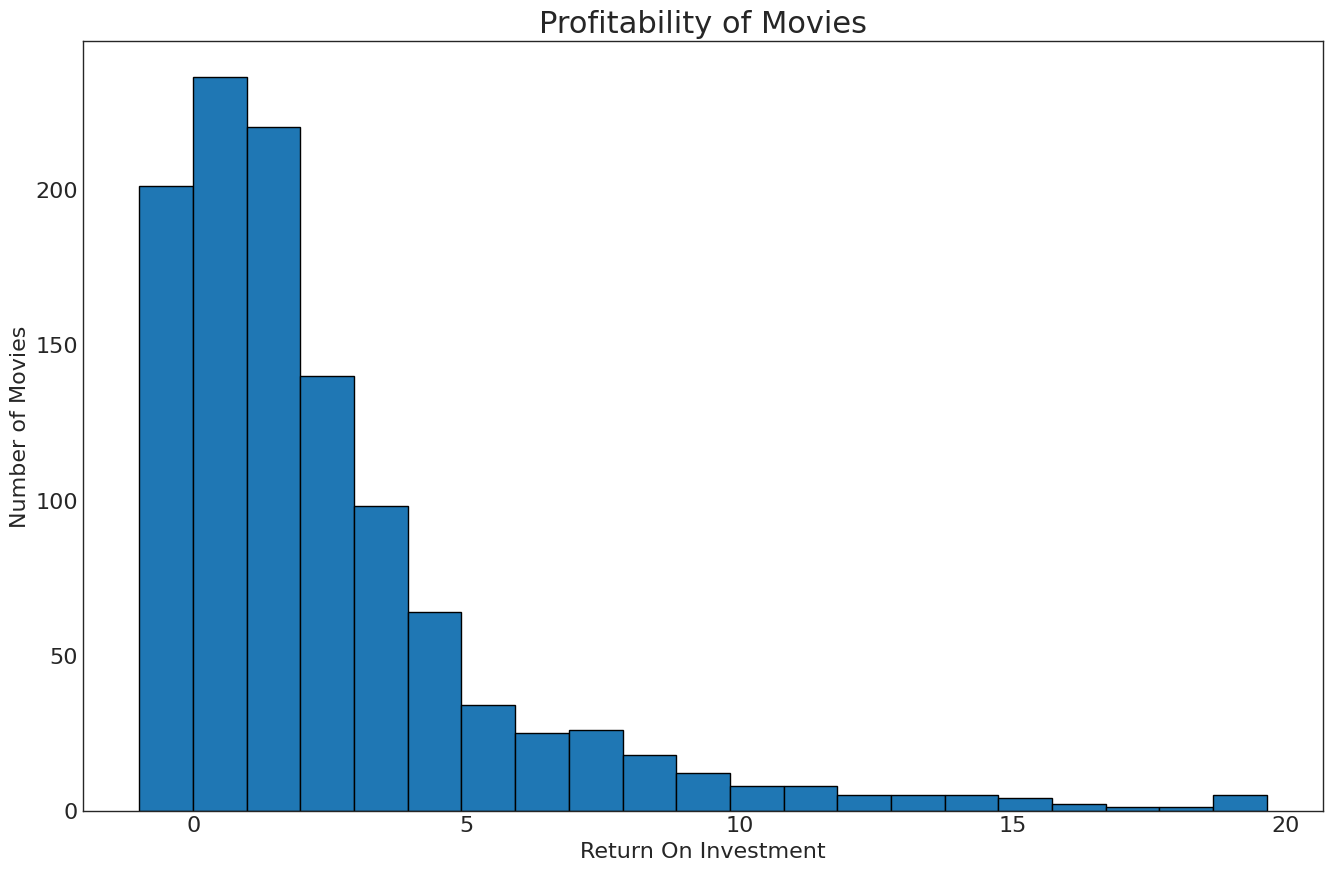

In [6]:
# visualizing profitability of the movies, the logic is in the visualization.py package
viz.profitability_movies(cleaned_data)

The first question answered by this is that making movies makes money. So generally we can say making movies makes money.

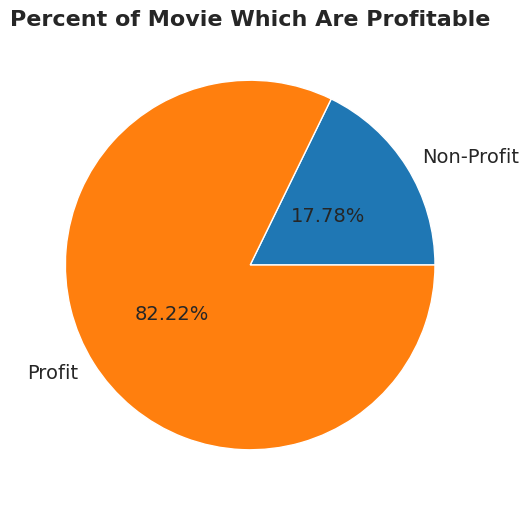

In [7]:
# pie chart illustrating this
viz.number_movie_pie(cleaned_data)

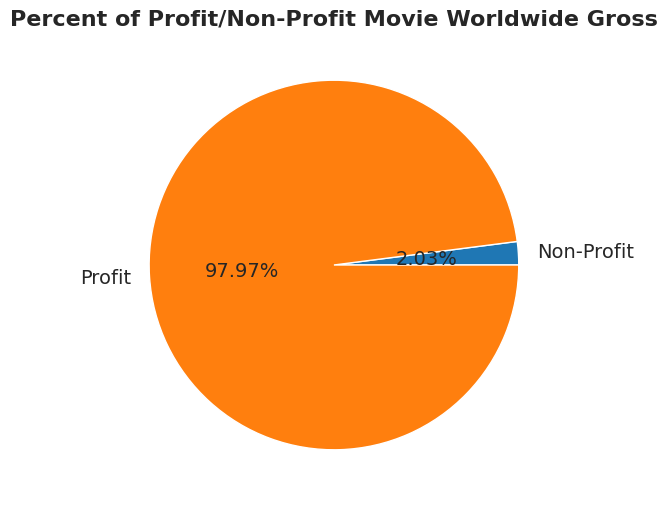

In [8]:
viz.worldwide_gross_pie(cleaned_data)

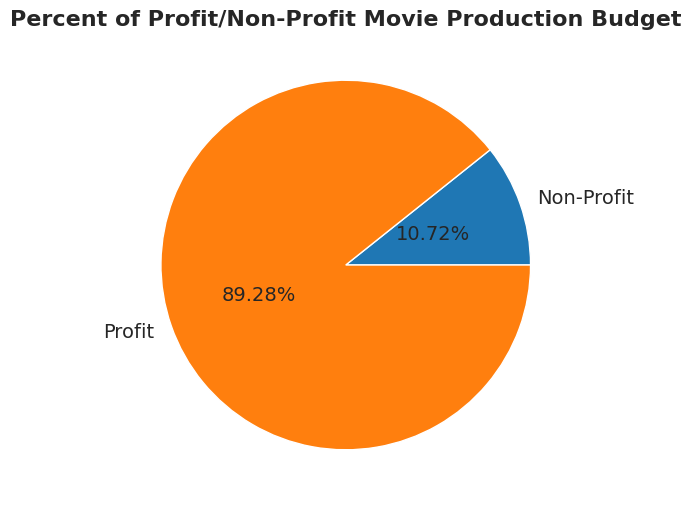

In [9]:
viz.production_budget_pie(cleaned_data)

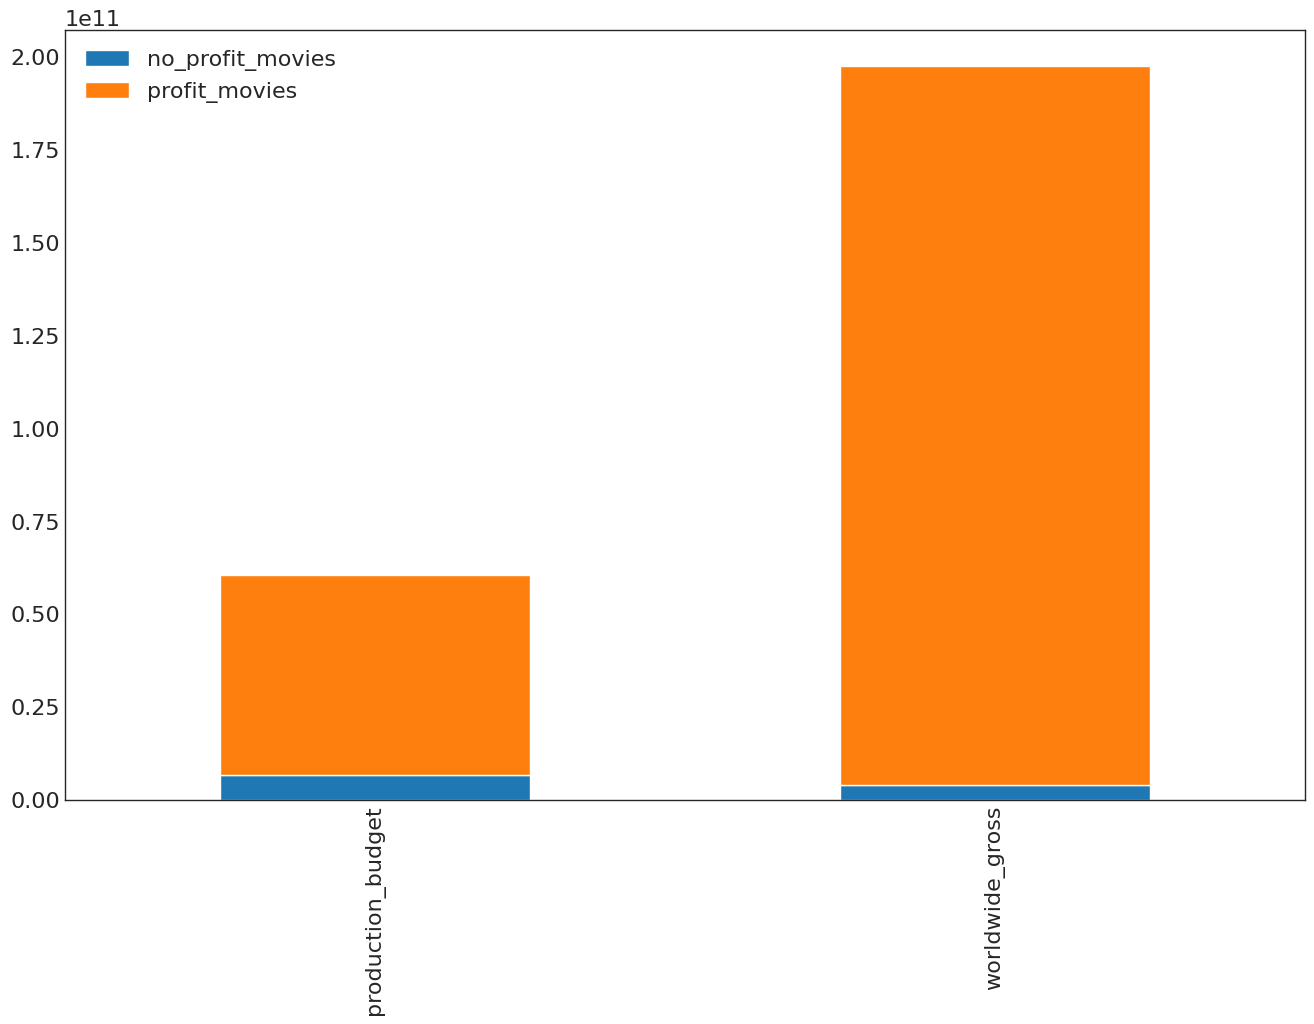

In [10]:
viz.movies_profit(cleaned_data)

We can also check whether higher vote_average means higher ROI


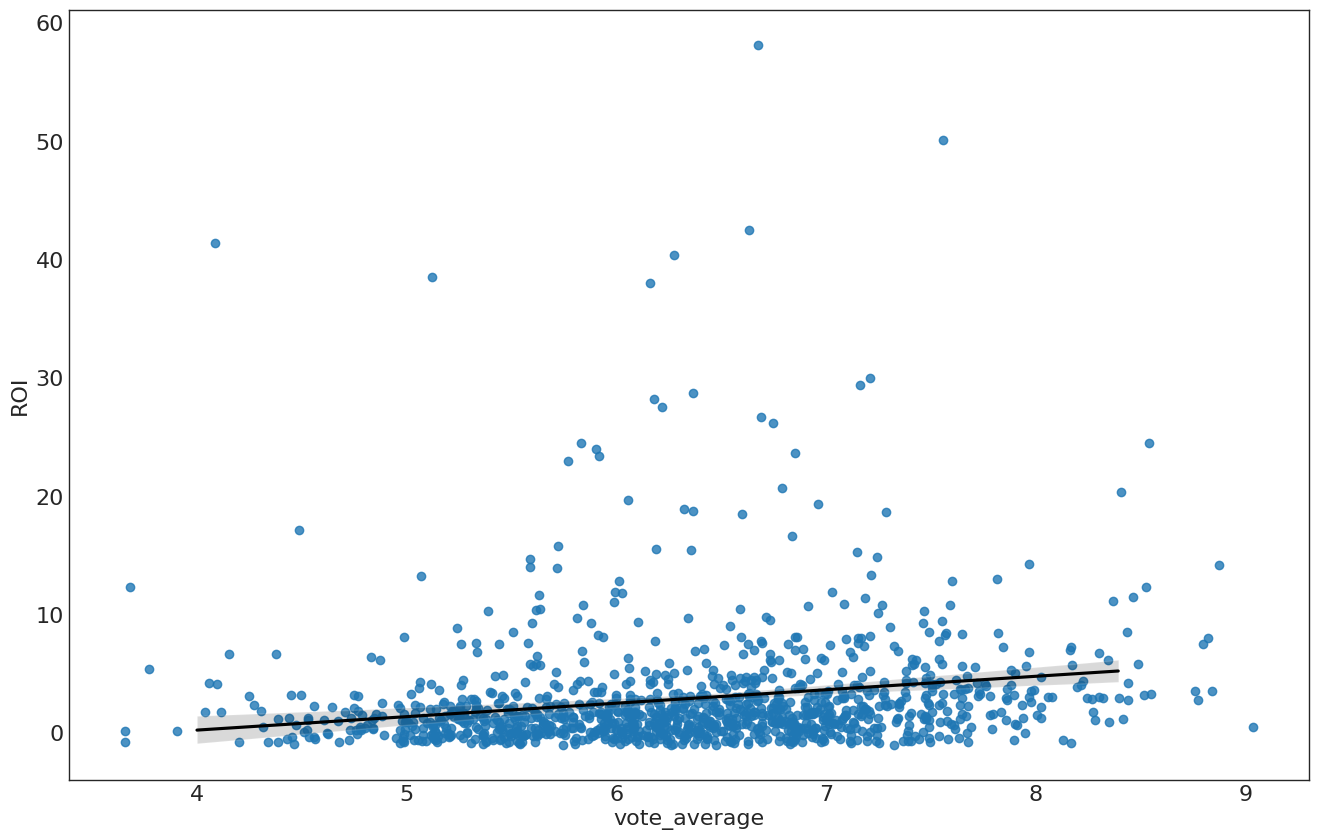

In [11]:
viz.vote(cleaned_data)

In [12]:
# Correlation between ROI and vote_average is weak though it's on the negative side

Does higher runtime mean higher ROI?


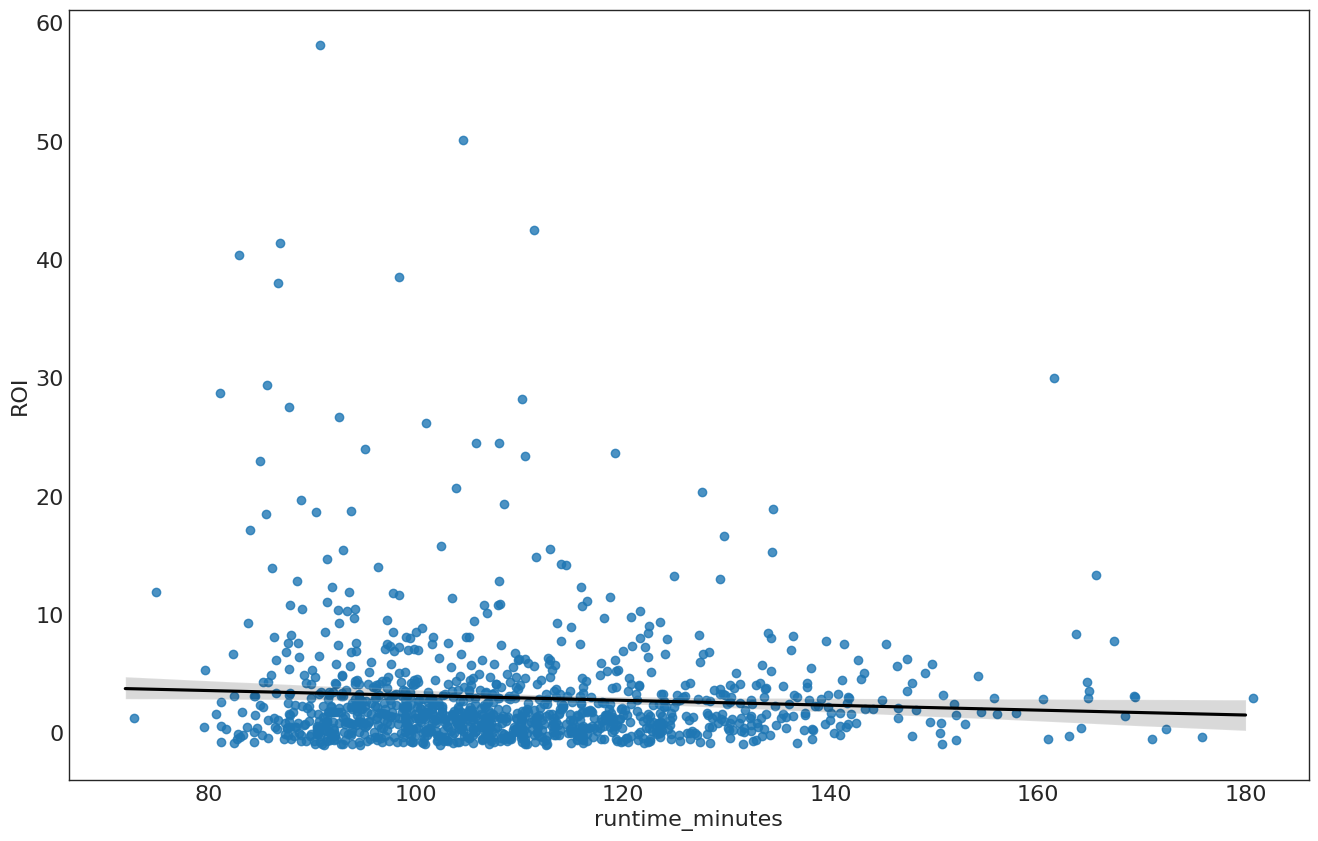

In [13]:
viz.runtime(cleaned_data.loc[cleaned_data['runtime_minutes'] > 70])

In [14]:
# No, shorter moveis according to the chart makes more money than elongated movies.

Text(0.5, 1.0, 'Overall: Profit vs Movie Runtime Analysis')

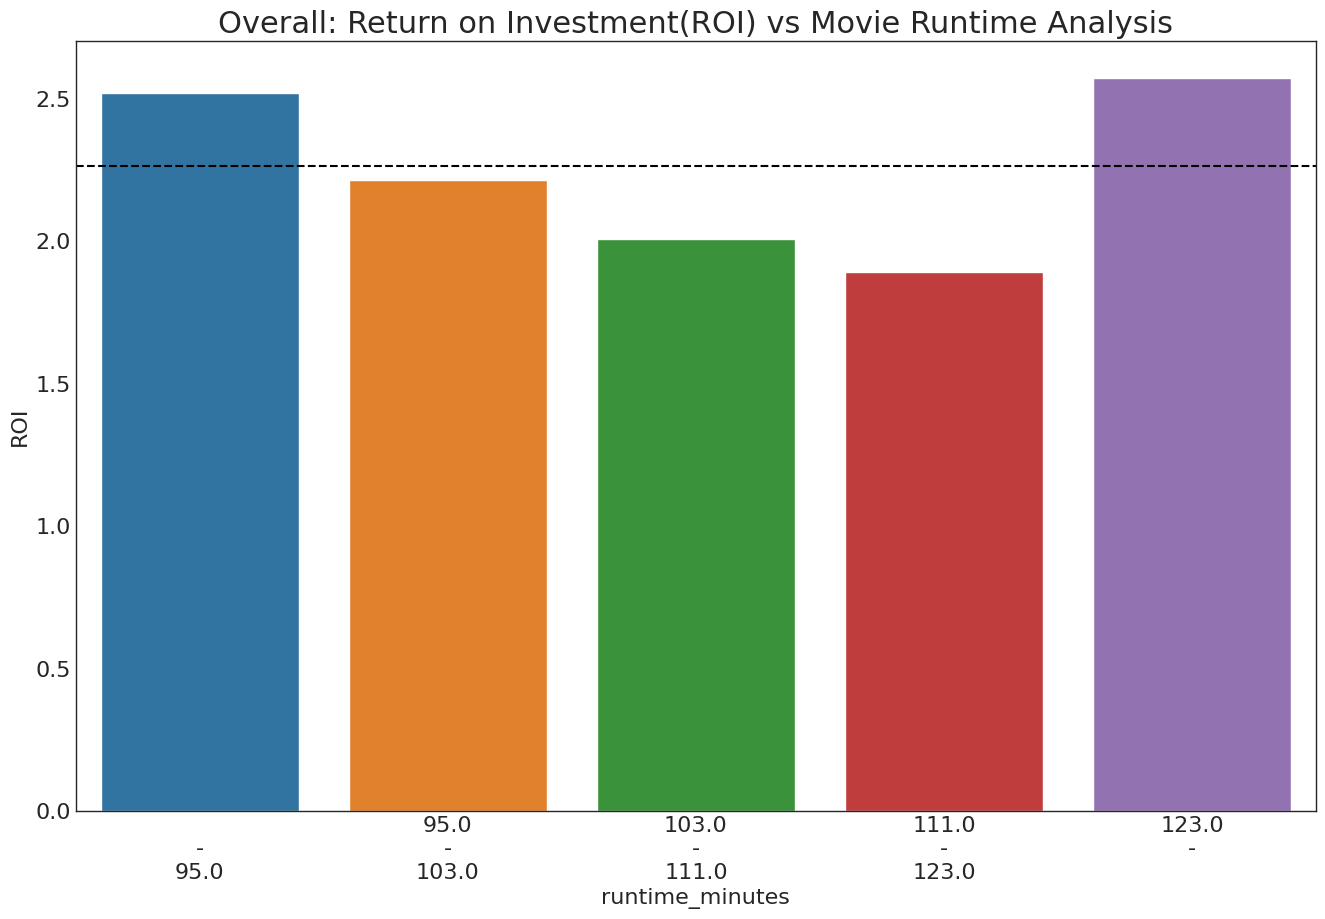

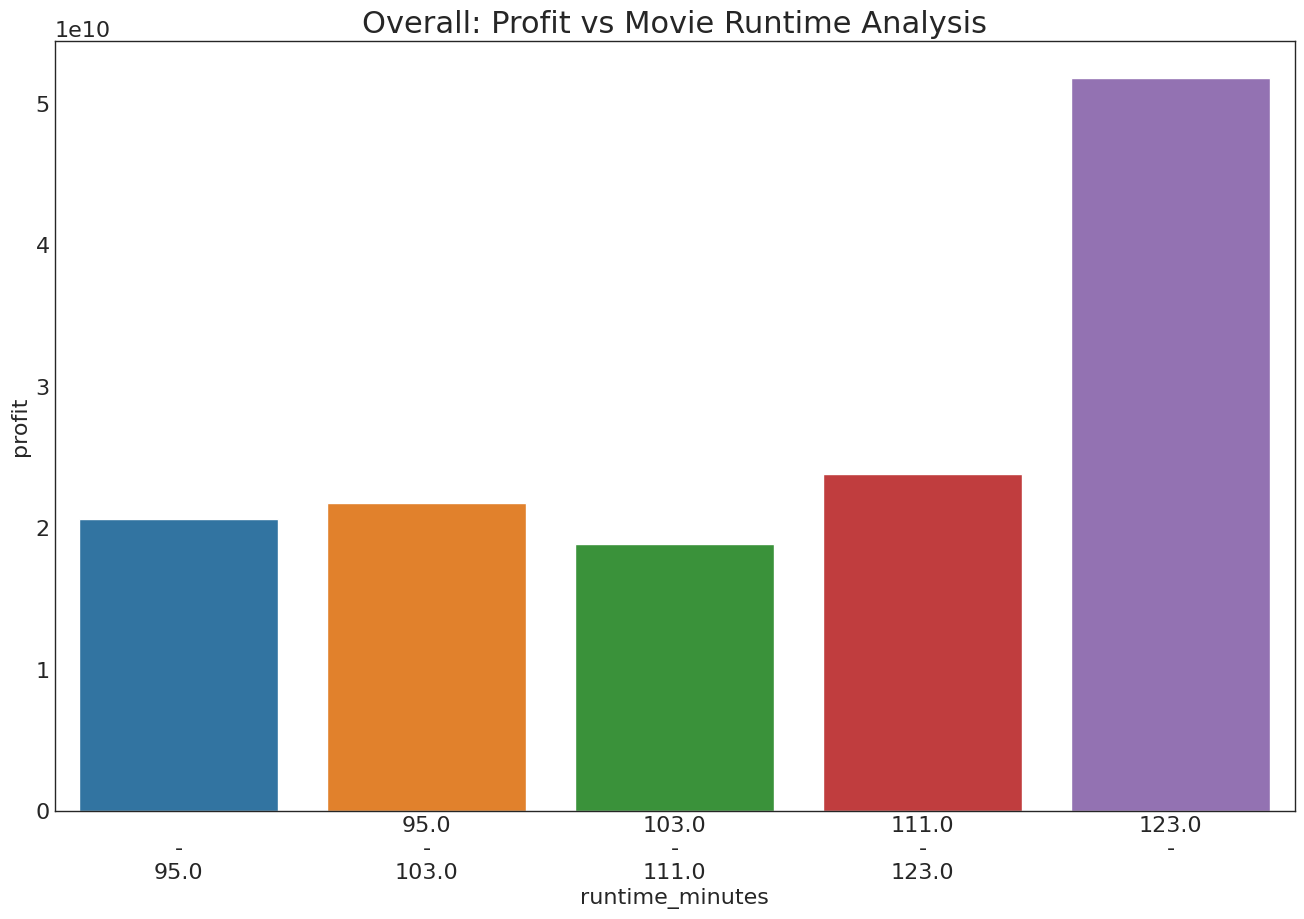

In [15]:
# bin_summary, quantile_cutoffs, ax = viz.column_quantile_analysis(cleaned_data, "runtime_minutes")
# quantile_cutoffs
bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(cleaned_data, "runtime_minutes")
roi_ax.set_title("Overall: Return on Investment(ROI) vs Movie Runtime Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')
profit_ax.set_title("Overall: Profit vs Movie Runtime Analysis")

In [16]:
# set range
lb = cleaned_data[(cleaned_data["production_budget"] < 5.57e6) & (cleaned_data["production_budget"] > 1e6)]
lb_sm = lb[lb["runtime_minutes"] < 90]
lb_lm = lb[lb["runtime_minutes"] >118]

hb = cleaned_data[(cleaned_data["production_budget"] > 5.8e7)]
hb_sm = hb[hb["runtime_minutes"] < 98]
hb_lm = hb[hb["runtime_minutes"] > 132]

sm = cleaned_data[(cleaned_data["runtime_minutes"] < 95)]
lm = cleaned_data[(cleaned_data["runtime_minutes"] > 128)]

In [17]:
# % of high budget movie profit in all profit
hb['profit'].sum()/cleaned_data['profit'].sum()

0.7042585720062402

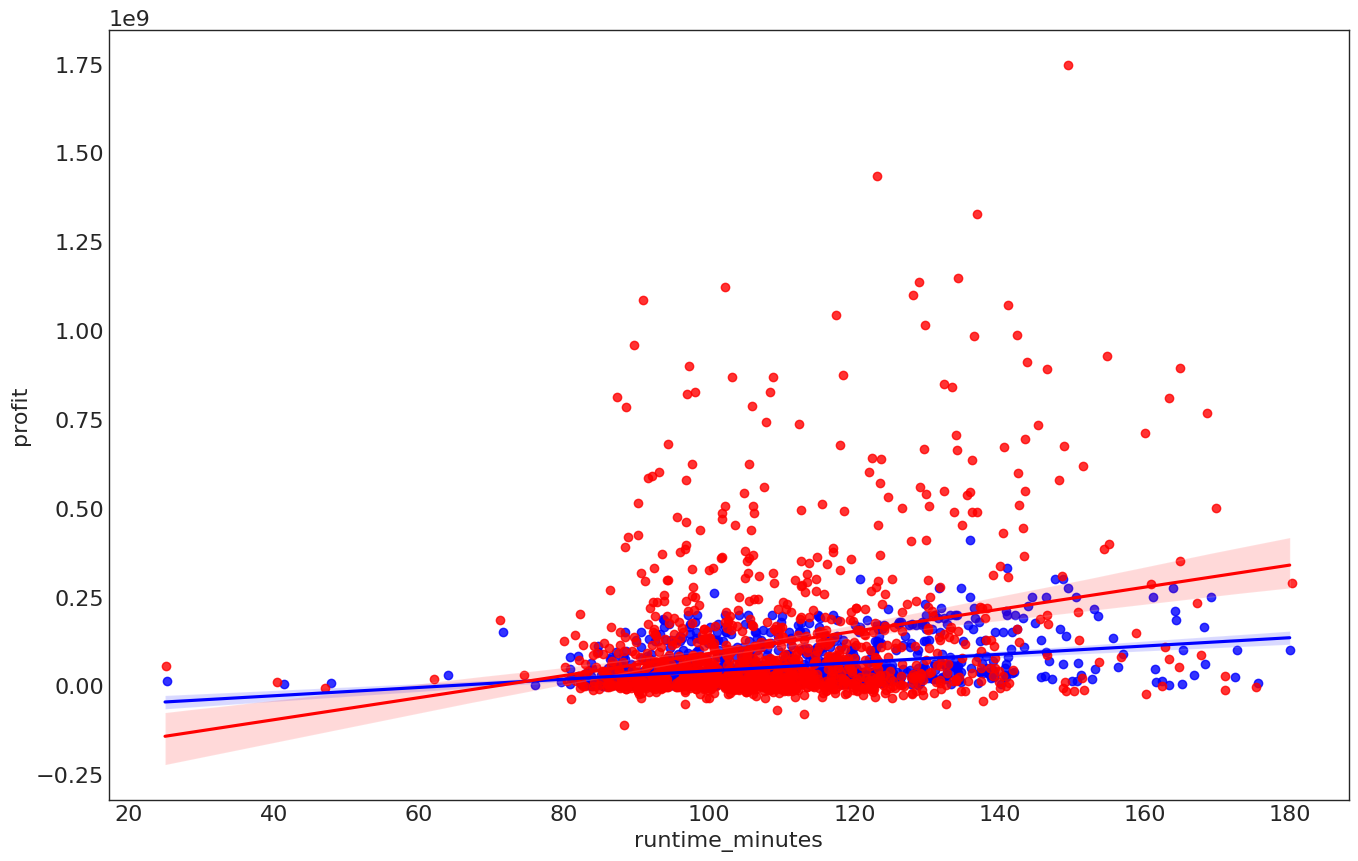

In [18]:
# Why does shorter runtime mean higher ROI?
# Hypothesis: Lower cost for shorter movies; similar profit.
viz.cost(cleaned_data)
# Result: Smaller movies do have lower cost, but also have lower profit.

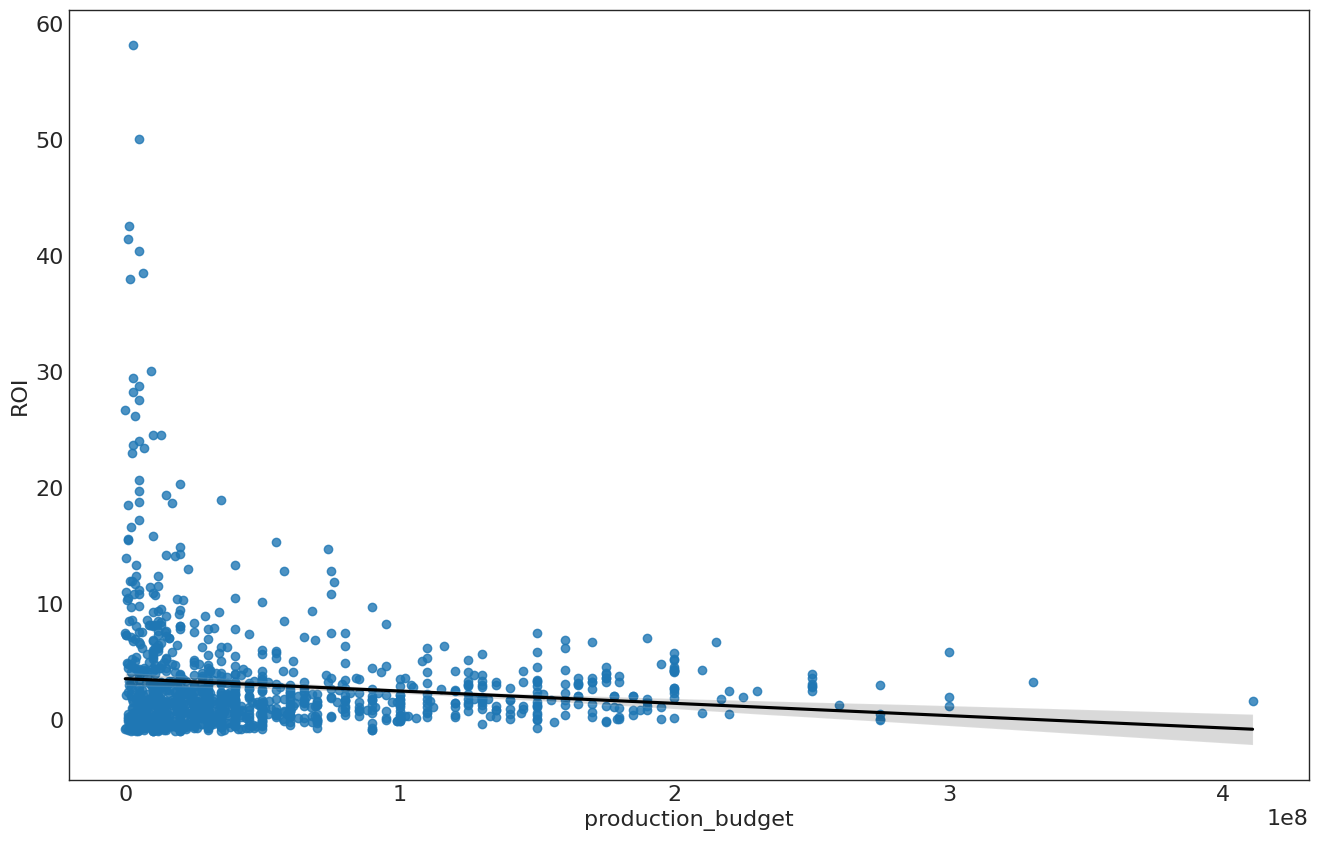

In [19]:
# Can we see a direct relationship between budget and ROI?
viz.budget_roi(cleaned_data)
# Result: Big budget movies tend to do worse than low budget movies, per $ invested.

Text(0.5, 1.0, 'Overall: Profit vs Production Budget Analysis')

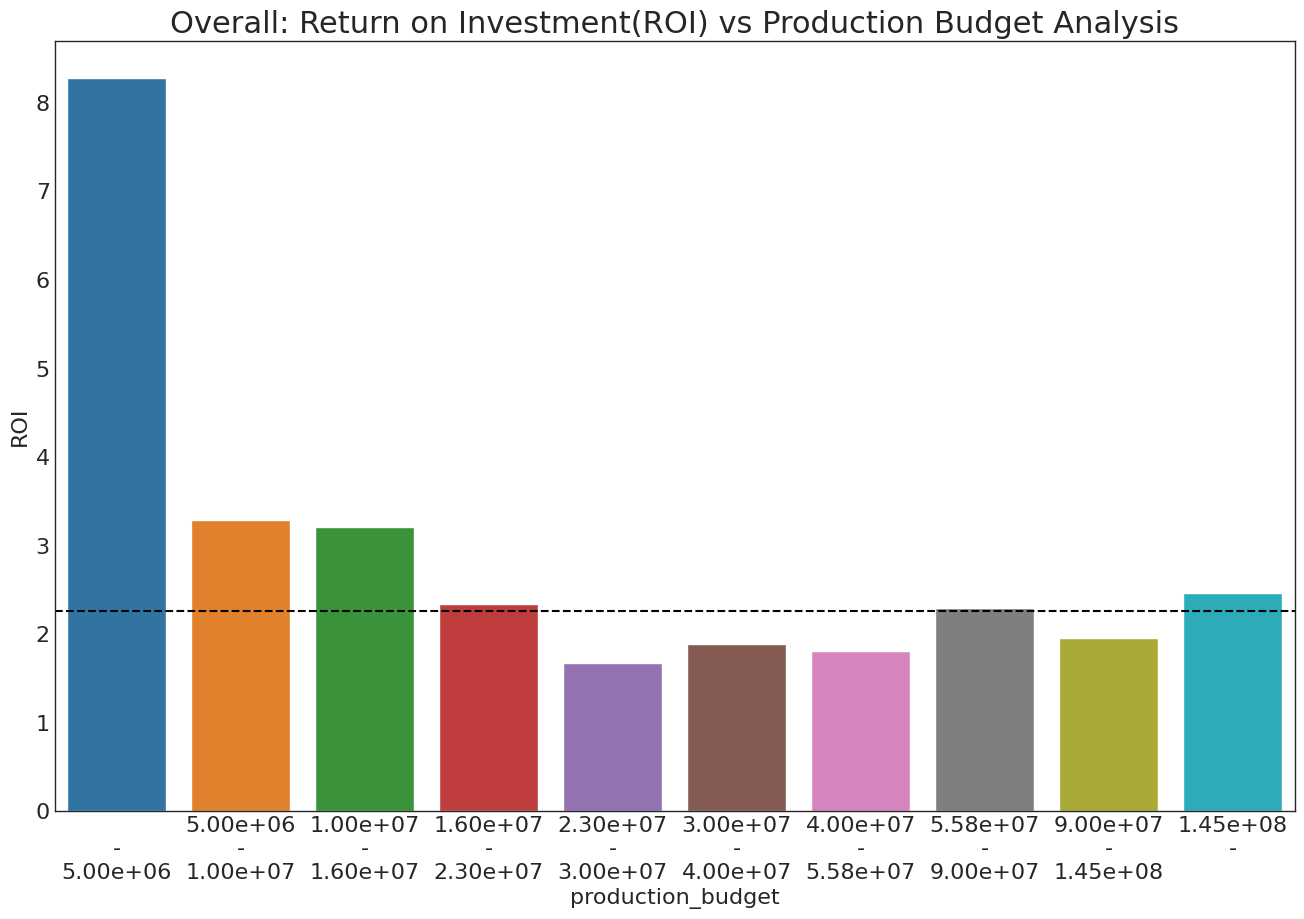

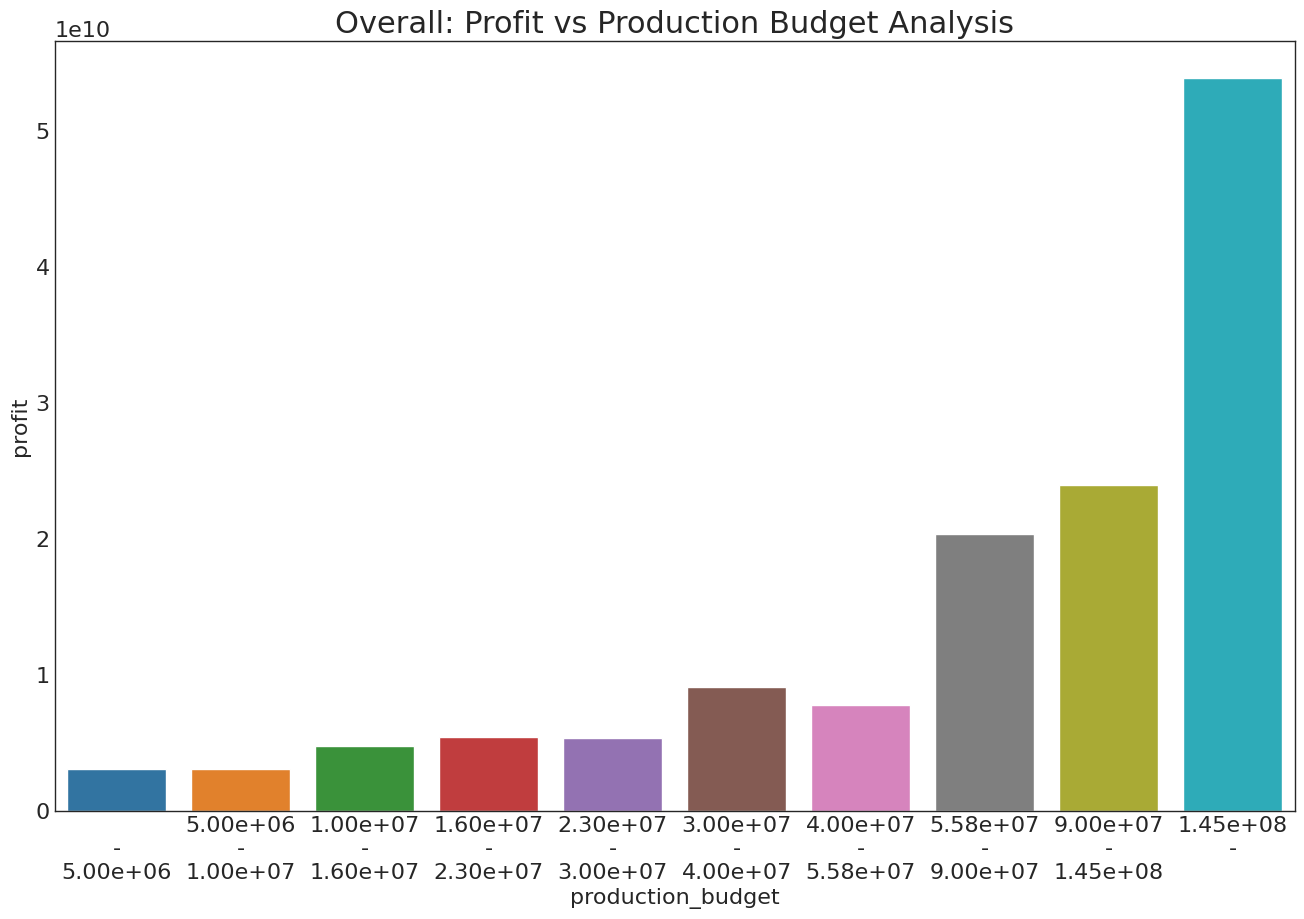

In [20]:
# making the trend more solid

# Assign data to bins based on production budget quantile

bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(cleaned_data, "production_budget", num_quantiles=10, format_string=".2e")
#bin_summary = column_quantile_analysis2(cleaned_data, "production_budget", num_quantiles=10)

bin_summary

roi_ax.set_title("Overall: Return on Investment(ROI) vs Production Budget Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')

profit_ax.set_title("Overall: Profit vs Production Budget Analysis")
#roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')
# Result: Middle of the pack movies are definitely the worst, sporting a ROI of barely 1.2, 
# less than half of what we could get making a movie with a 20-30 percentile budget (ROI 2.6), or a 90-100 percentile budget(ROI 2.5)
# Again, dirt cheap movies tend to be even better, but may worsen our brand.


Text(0.5, 1.0, 'Low Budget: Profit vs Production Budget Analysis')

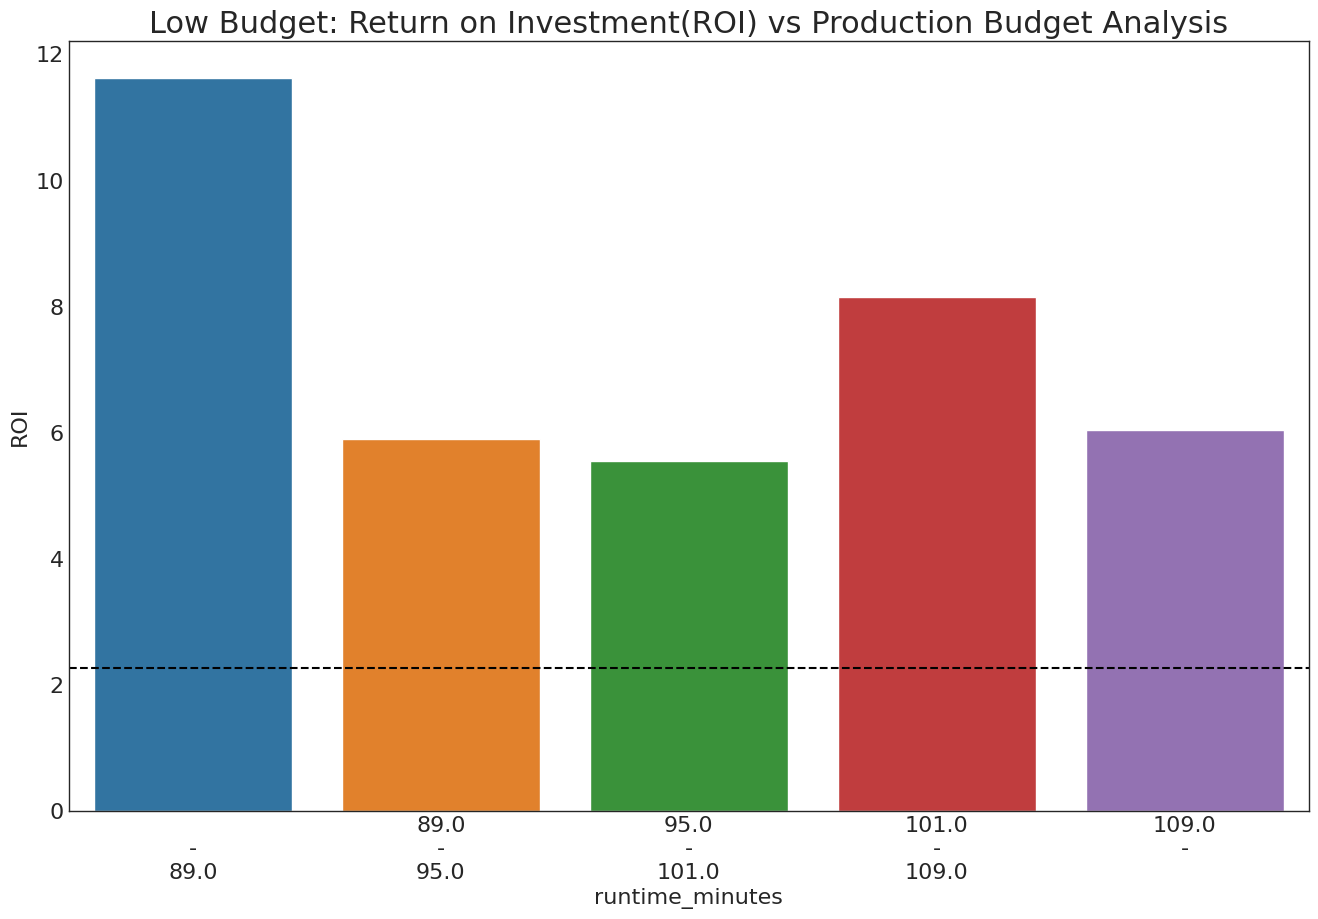

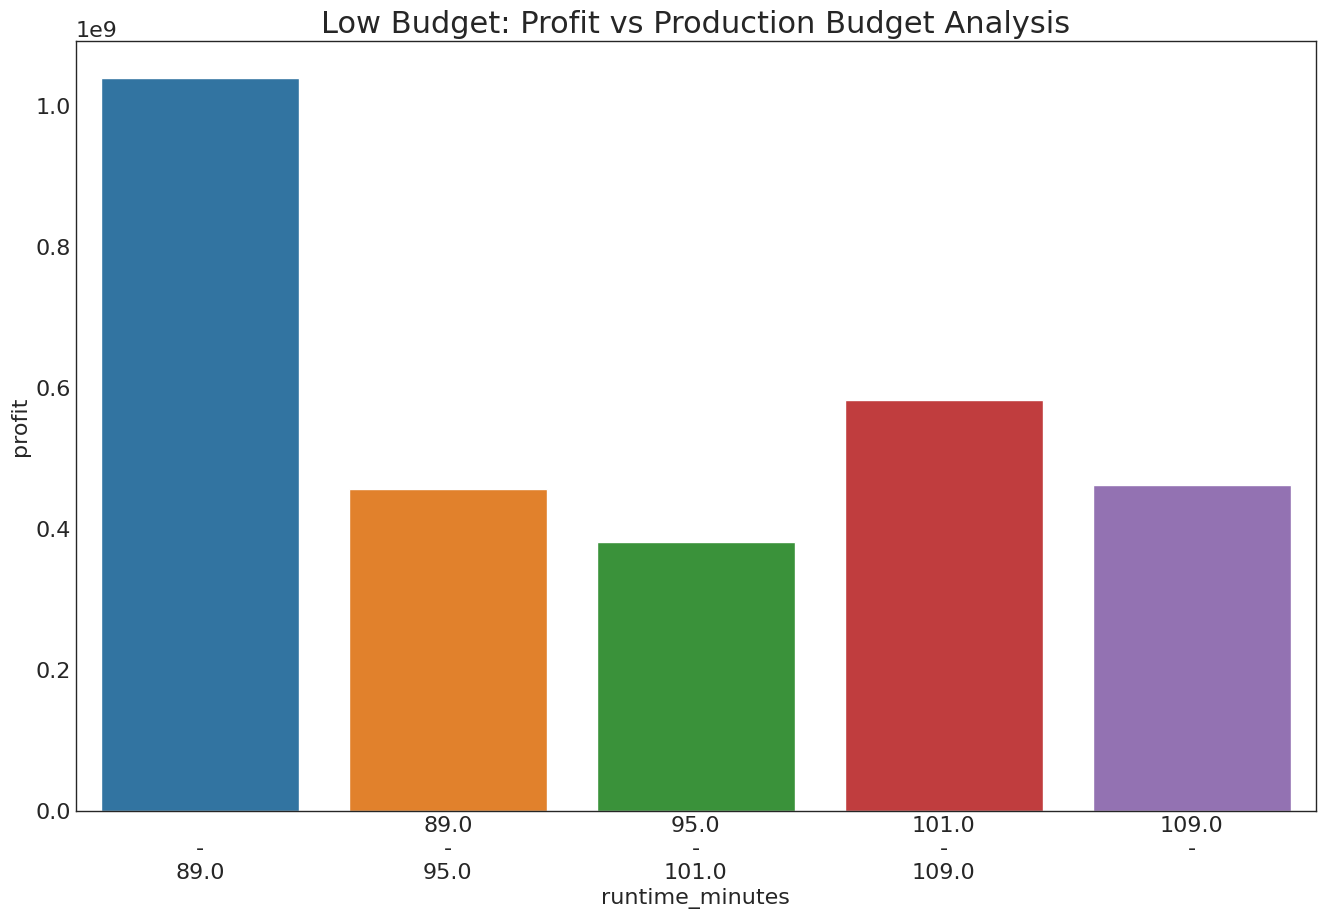

In [21]:
# Low budget movie
# The movie runtime should less than 89 minunts.
bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(lb, "runtime_minutes")
bin_summary

roi_ax.set_title("Low Budget: Return on Investment(ROI) vs Production Budget Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')

profit_ax.set_title("Low Budget: Profit vs Production Budget Analysis")

Text(0.5, 1.0, 'High Budget: Profit vs Production Budget Analysis')

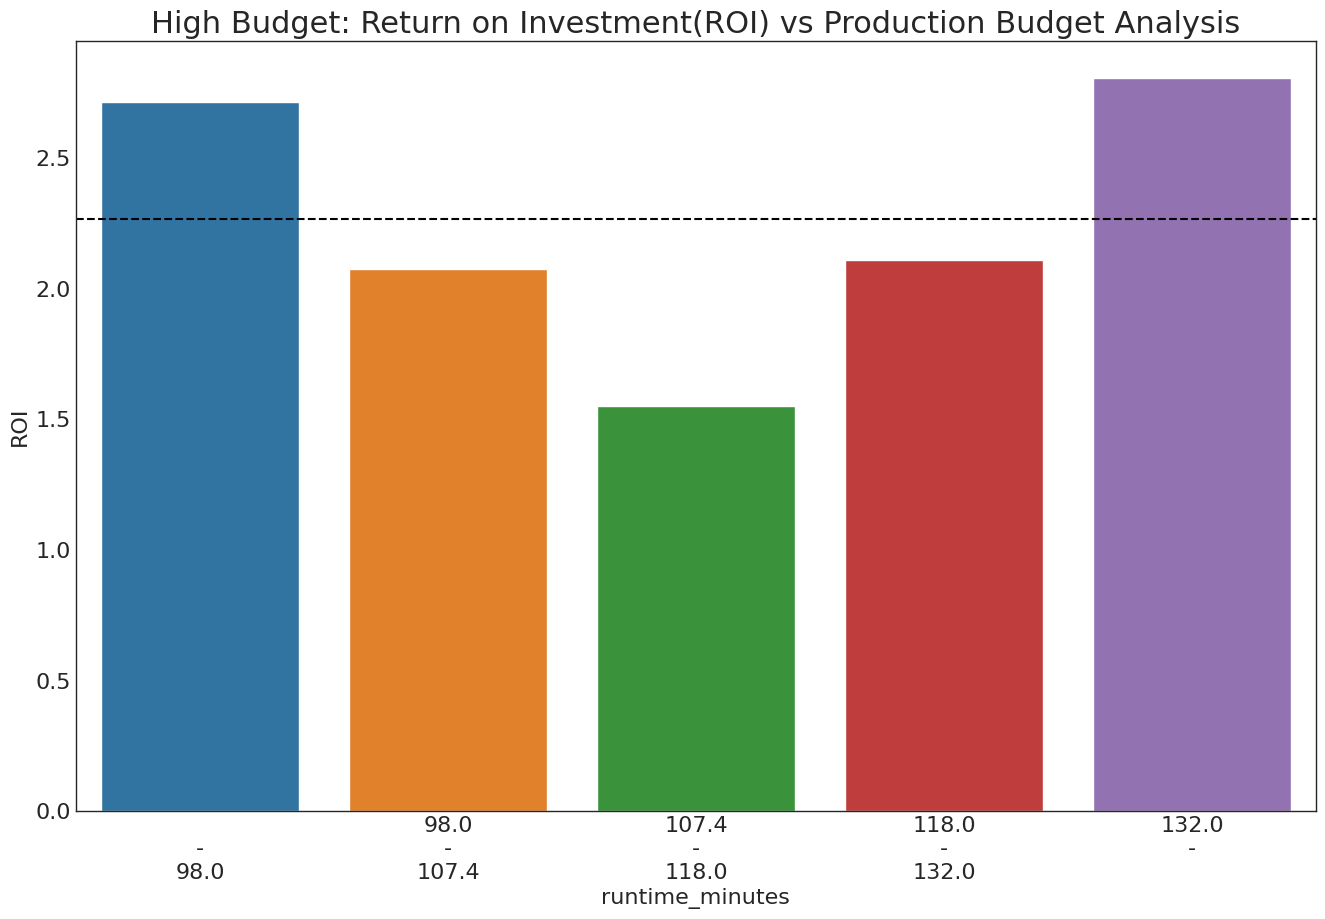

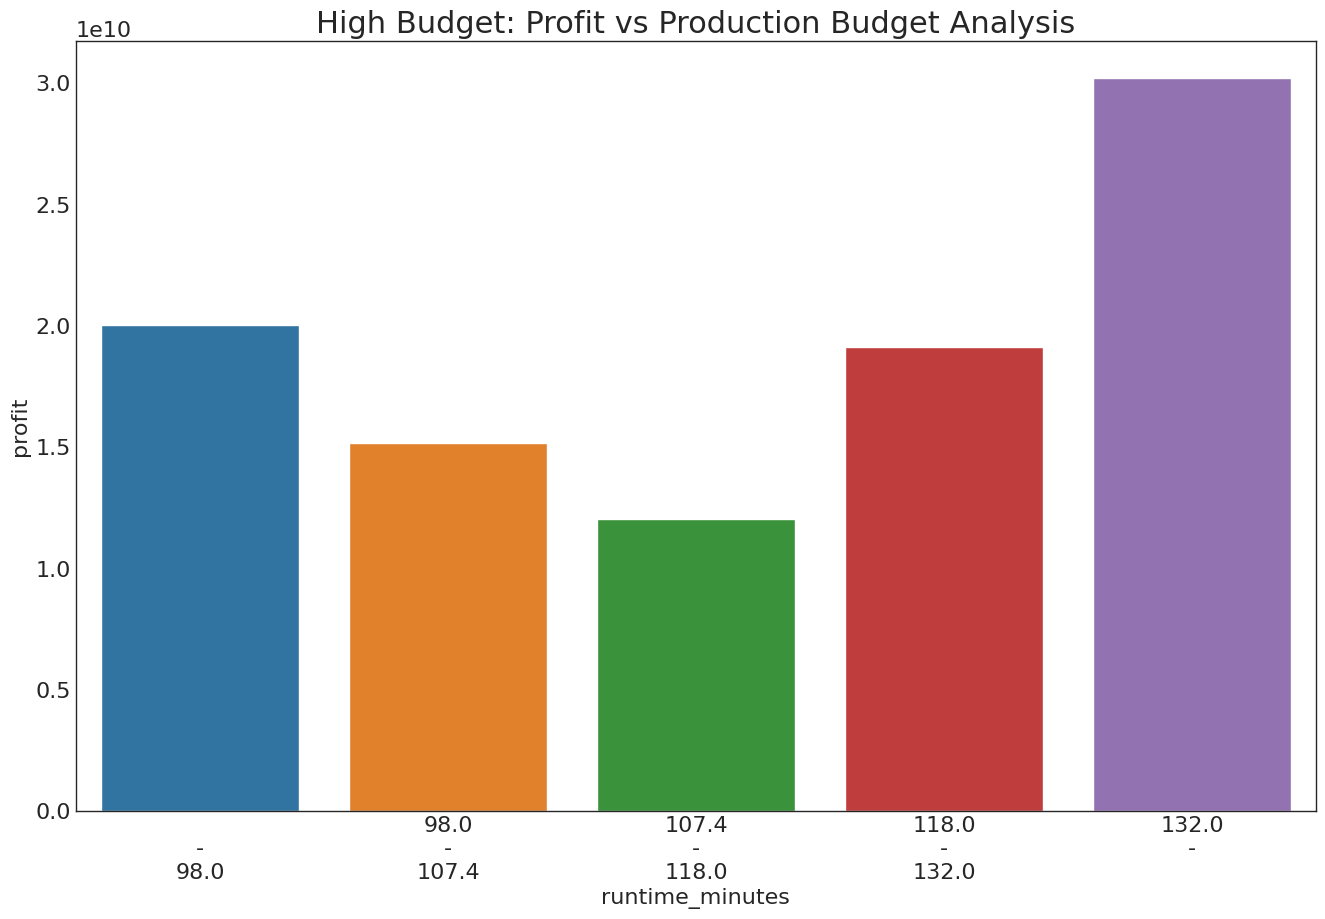

In [22]:
# High budget movie
# The movie should either less than 98 minunts or longer than 132 minunts
bin_summary, roi_ax, profit_ax = viz.column_quantile_analysis2(hb, "runtime_minutes")
bin_summary

roi_ax.set_title("High Budget: Return on Investment(ROI) vs Production Budget Analysis")
roi_ax.axhline(viz.calculate_average_roi(cleaned_data), ls='--', color ='black')

profit_ax.set_title("High Budget: Profit vs Production Budget Analysis")

In [23]:
for title, df in [("all movies", cleaned_data),
                  ("short movies", sm),
                  ("long movies", lm),
                  ("low budget movies", lb),
                  ("high budget movies", hb),
                  ("low budget short movies", lb_sm),
                  ("low budget long movies", lb_lm),
                  ("high budget short movies", hb_sm),
                  ("high budget long movies", hb_lm)
                 ]:
    print(f"The Average vote for {title}: {df['vote_average'].median():.2f}")

print("=============================")
for title, df in [("all movies", cleaned_data),
                  ("short movies", sm),
                  ("long movies", lm),
                  ("low budget movies", lb),
                  ("high budget movies", hb),
                  ("low budget short movies", lb_sm),
                  ("low budget long movies",
                   lb_lm),
                  ("high budget short movies", hb_sm),
                  ("high budget long movies", hb_lm)
                 ]:
    print(f" The Average ROI for {title}: {viz.calculate_average_roi(df):.2f}")

The Average vote for all movies: 6.39
The Average vote for short movies: 5.90
The Average vote for long movies: 7.00
The Average vote for low budget movies: 6.30
The Average vote for high budget movies: 6.40
The Average vote for low budget short movies: 5.90
The Average vote for low budget long movies: 7.10
The Average vote for high budget short movies: 6.35
The Average vote for high budget long movies: 7.10
 The Average ROI for all movies: 2.27
 The Average ROI for short movies: 2.51
 The Average ROI for long movies: 2.68
 The Average ROI for low budget movies: 7.62
 The Average ROI for high budget movies: 2.27
 The Average ROI for low budget short movies: 11.63
 The Average ROI for low budget long movies: 6.19
 The Average ROI for high budget short movies: 2.67
 The Average ROI for high budget long movies: 2.81


In [24]:
cleaned_data[cleaned_data["genres"].notnull()].copy().head()

,cleaned_title,year,studio,production_budget,domestic_gross,worldwide_gross,id,vote_count,vote_total,vote_average,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes,profit,ROI,profit_status
0,10 Cloverfield Lane,2016,Par.,5000000,72082999,108286422,333371,4629,31940.1,6.9,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",7.2,260383,103286422,20.657284,Profit
1,12 Strong,2018,WB,35000000,45819713,71118378,429351,1312,7347.2,5.6,12 Strong,130.0,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",6.6,50155,36118378,1.031954,Profit
2,12 Years a Slave,2013,FoxS,20000000,56671993,181025343,76203,6631,52384.9,7.9,12 Years a Slave,134.0,"Biography,Drama,History",nm2588606,"nm0725983,nm1185849",8.1,577301,161025343,8.051267,Profit
3,127 Hours,2010,FoxS,18000000,18335230,60217171,44115,4469,31283.0,7.0,127 Hours,94.0,"Adventure,Biography,Drama",nm0000965,"nm0000965,nm0064479,nm1737008",7.6,323949,42217171,2.345398,Profit
4,13 Sins,2014,RTWC,4000000,9134,47552,155084,576,3628.8,6.3,13 Sins,93.0,"Horror,Thriller",nm0821844,"nm0083547,nm0821844,nm1840848,nm2636866",6.3,29550,-3952448,-0.988112,Non-Profit


In [25]:
# For all movies, breakdown by genre
cd_copy = cleaned_data[cleaned_data["genres"].notnull()].copy()
cd_copy2 = cd_copy.copy()
cd_copy["genres"] = cd_copy["genres"].str.split(",")
vcs = cd_copy.explode("genres")["genres"].value_counts()
infrequent_genres = vcs[vcs < 50].index
cd_freq_genres_only = cd_copy2[cd_copy2["genres"].str.contains('|'.join(infrequent_genres))== False]

/workspaces/movies-dsc-project1/code/visualization.py:322: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_by_genre_unordered = sploded_data.groupby("genres").sum()["profit"]


Text(0.5, 1.0, 'Overall Movies: Profit vs Genre')

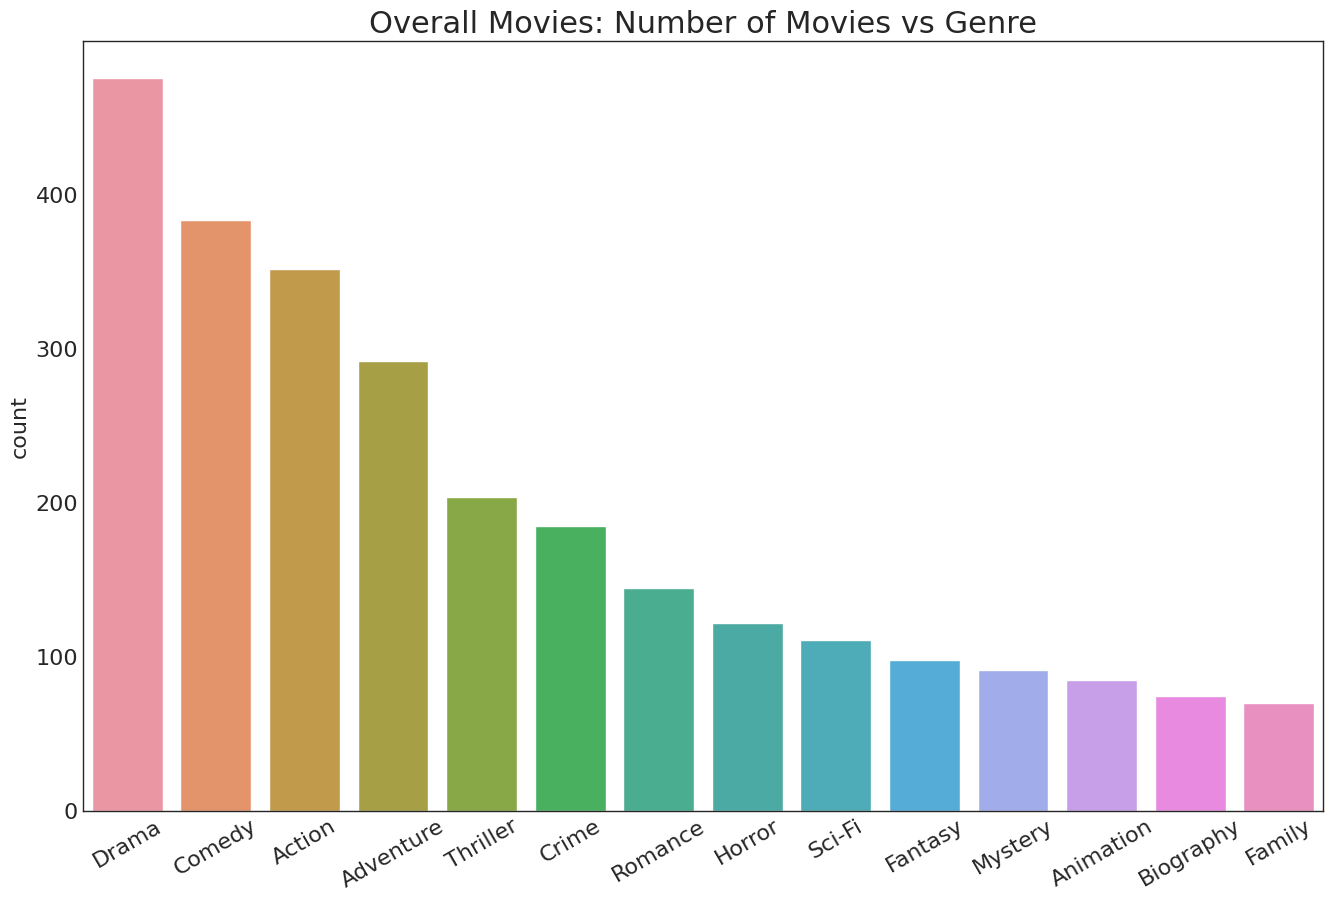

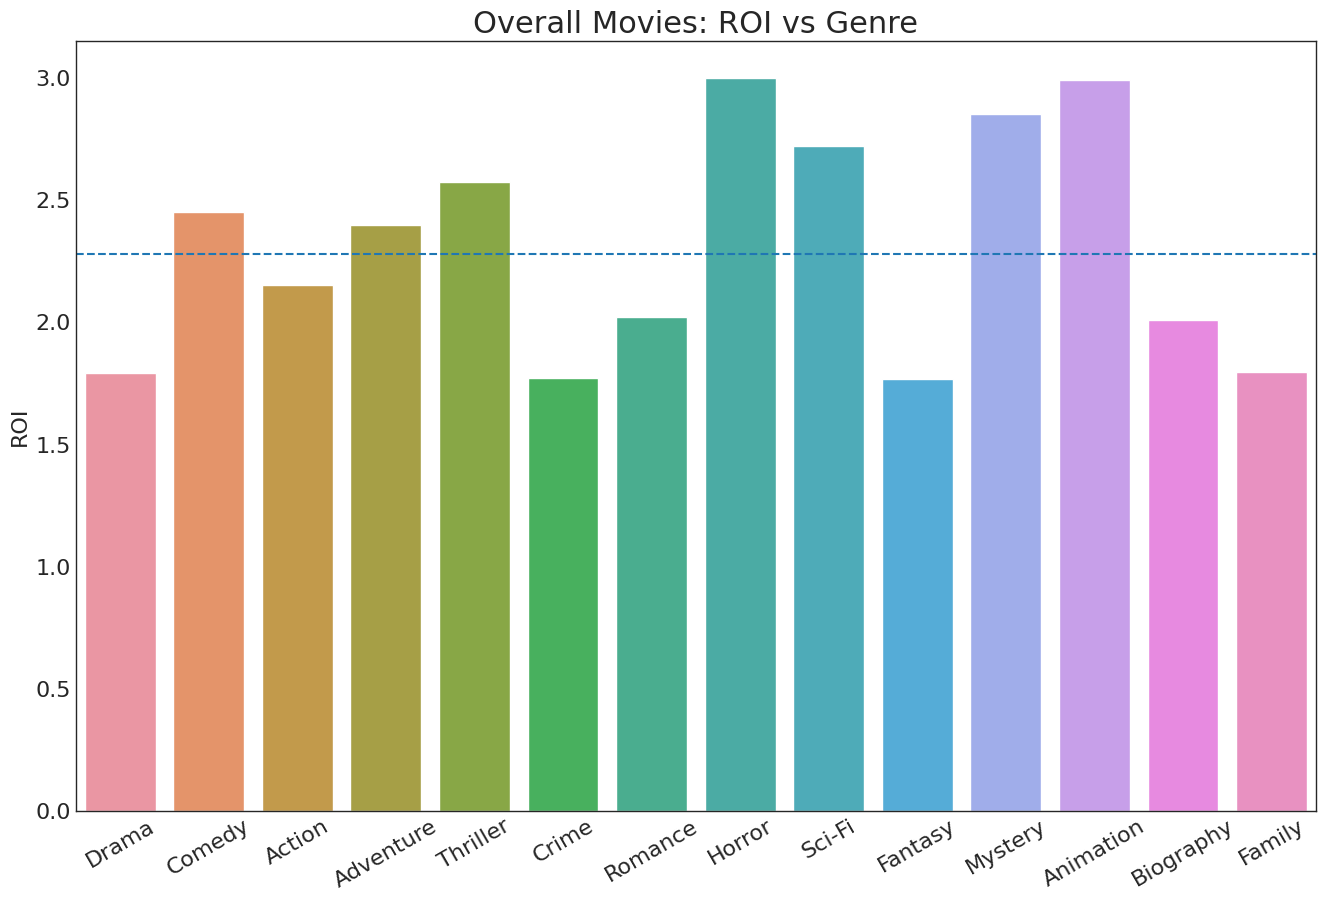

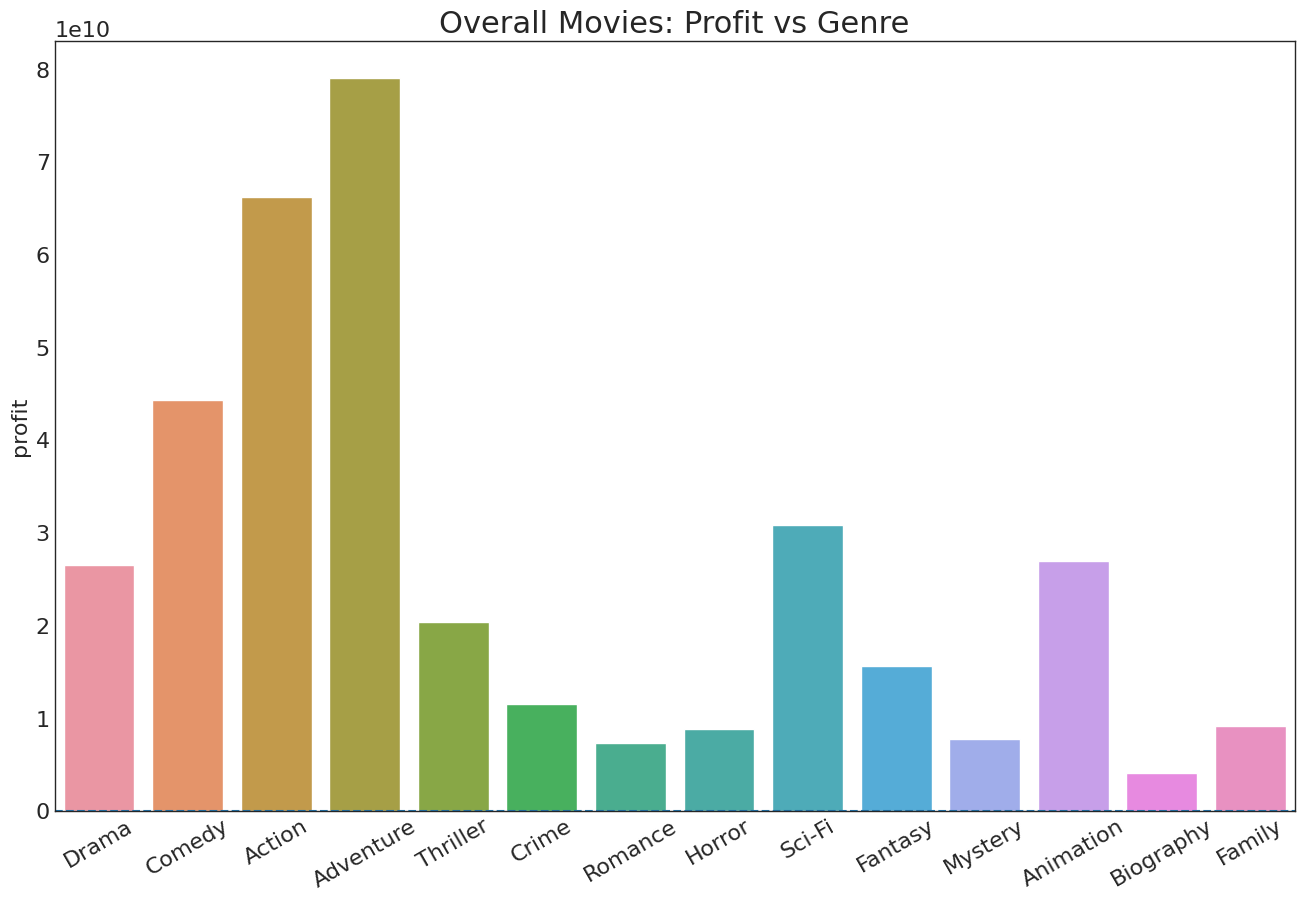

In [26]:
# For all movies, genre
count_ax, roi_ax, profit_ax, avg_roi, counts_and_roi_by_genre = viz.genre(cd_freq_genres_only.copy())
count_ax.set_title("Overall Movies: Number of Movies vs Genre")
roi_ax.set_title("Overall Movies: ROI vs Genre")
profit_ax.set_title("Overall Movies: Profit vs Genre")

/workspaces/movies-dsc-project1/code/visualization.py:322: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_by_genre_unordered = sploded_data.groupby("genres").sum()["profit"]


Average ROI across all genres: 2.8058354132154664


,count,ROI,profit
Action,44,2.944853,24133663396
Adventure,42,2.908519,24010407090
Sci-Fi,24,3.530116,15545219103
Drama,24,1.865273,4763908365
Fantasy,10,2.394768,5689010007
Thriller,10,3.285283,5322157820
Mystery,7,1.588441,1056313354
Crime,6,3.659243,2788343335
Biography,5,2.446792,1039886646
Romance,3,1.470493,507319986


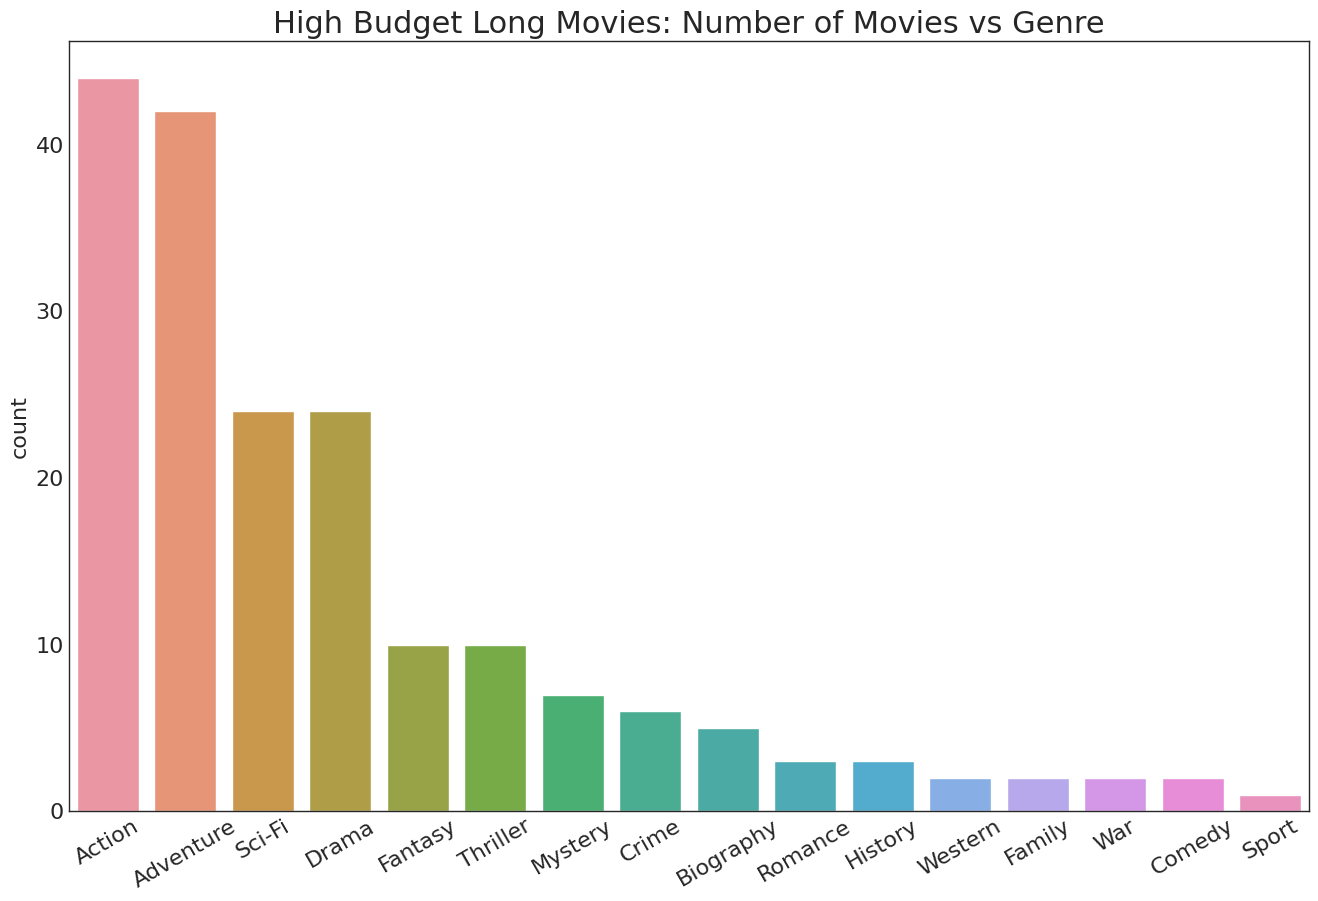

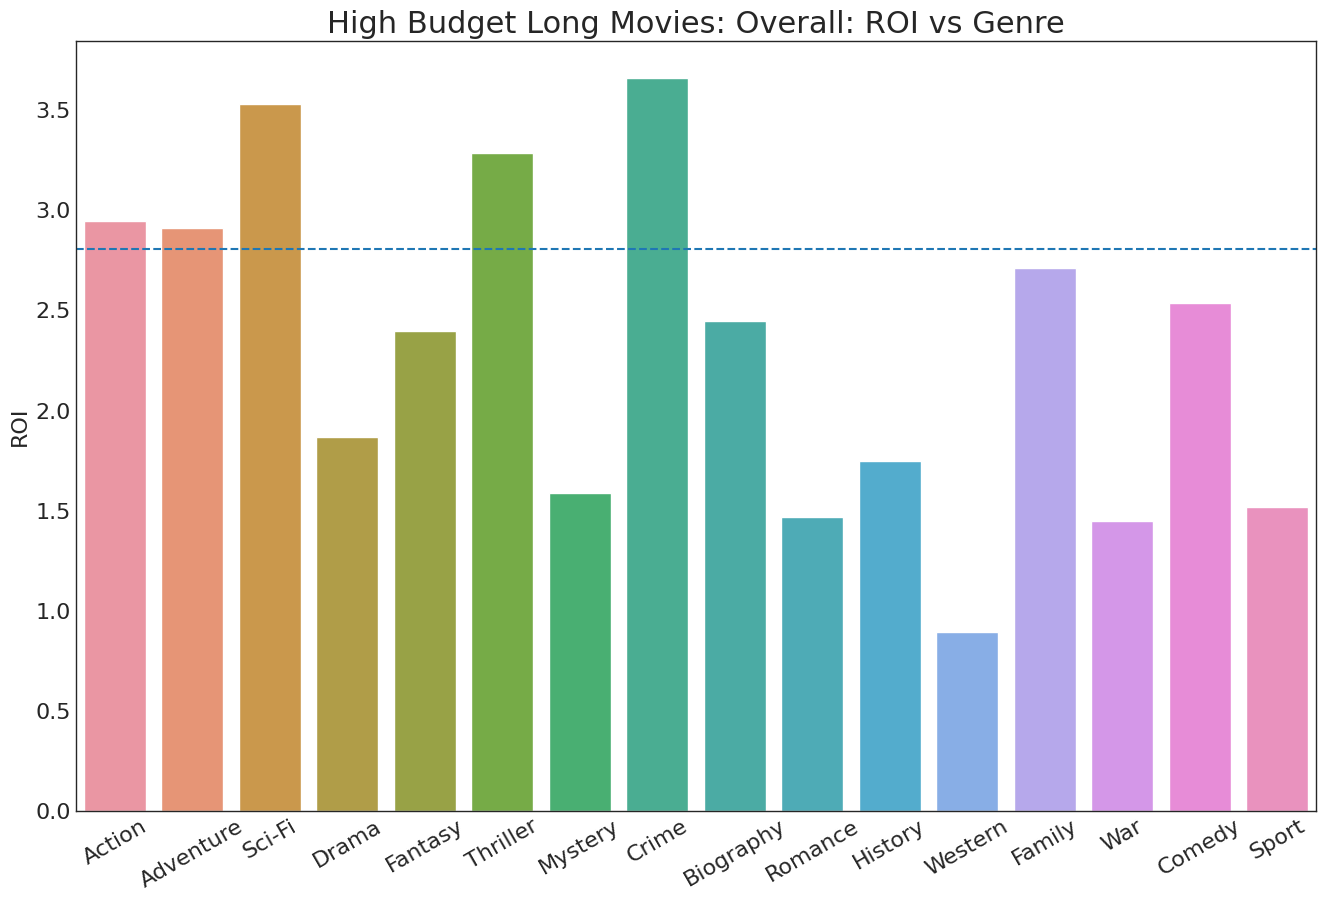

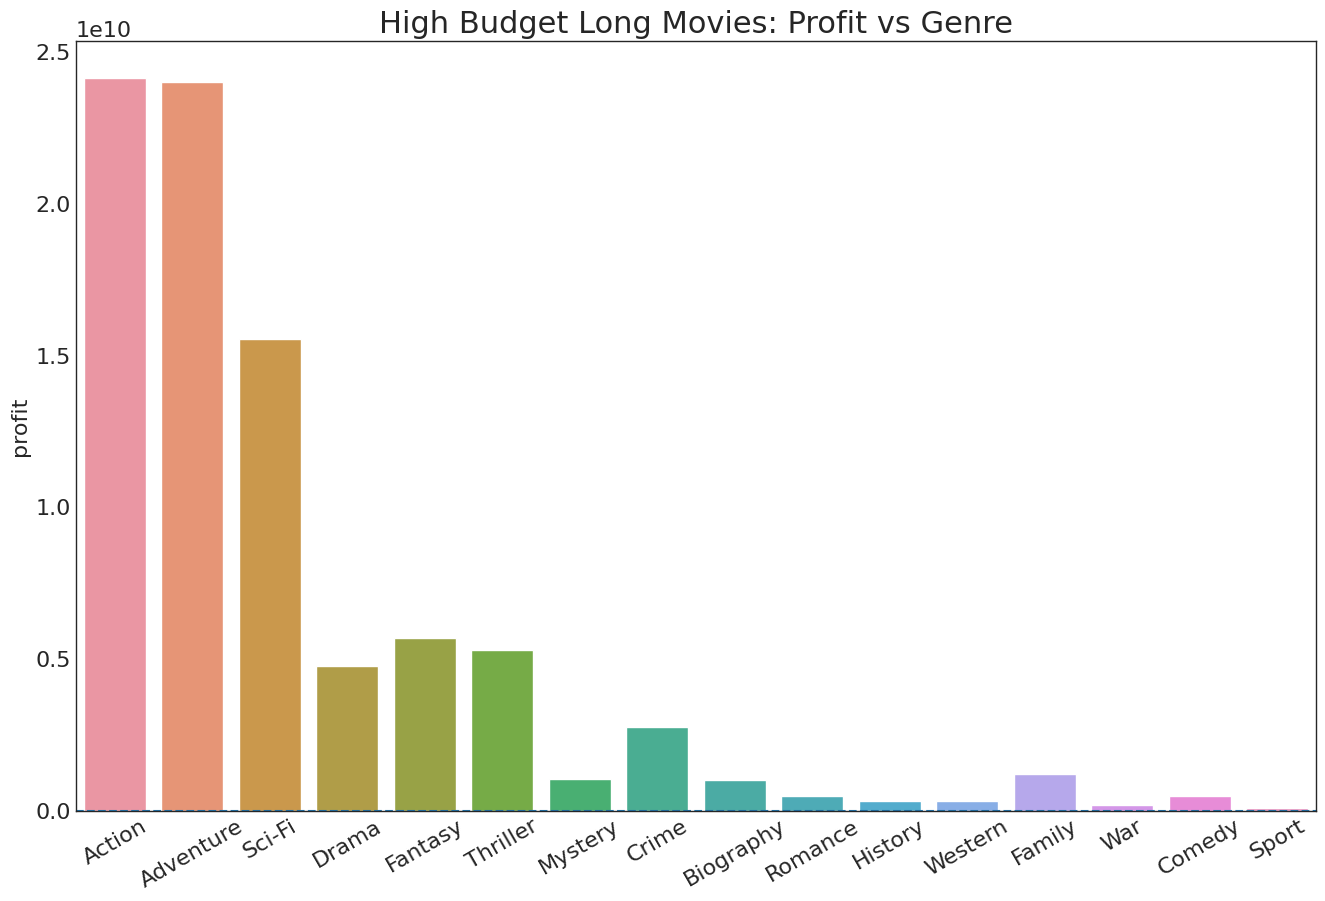

In [27]:
# For long_big_budget_movies, genre
count_ax, roi_ax, profit_ax, avg_roi, counts_and_roi_by_genre = viz.genre(hb_lm.copy())
count_ax.set_title("High Budget Long Movies: Number of Movies vs Genre")
roi_ax.set_title("High Budget Long Movies: Overall: ROI vs Genre")
profit_ax.set_title("High Budget Long Movies: Profit vs Genre")
print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

Average ROI across all genres: 2.6706777090361924


/workspaces/movies-dsc-project1/code/visualization.py:322: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_by_genre_unordered = sploded_data.groupby("genres").sum()["profit"]


,count,ROI,profit
Adventure,46,2.766522,13742696822
Comedy,46,2.932967,13531241012
Animation,44,3.022200,14260250581
Action,17,1.842089,3181287183
Family,7,2.330619,1773601407
Fantasy,4,0.931108,237432566
Drama,3,3.801937,912464952
Sci-Fi,3,3.093794,742510452
Thriller,2,3.239216,566862823
Horror,2,1.424792,185222919


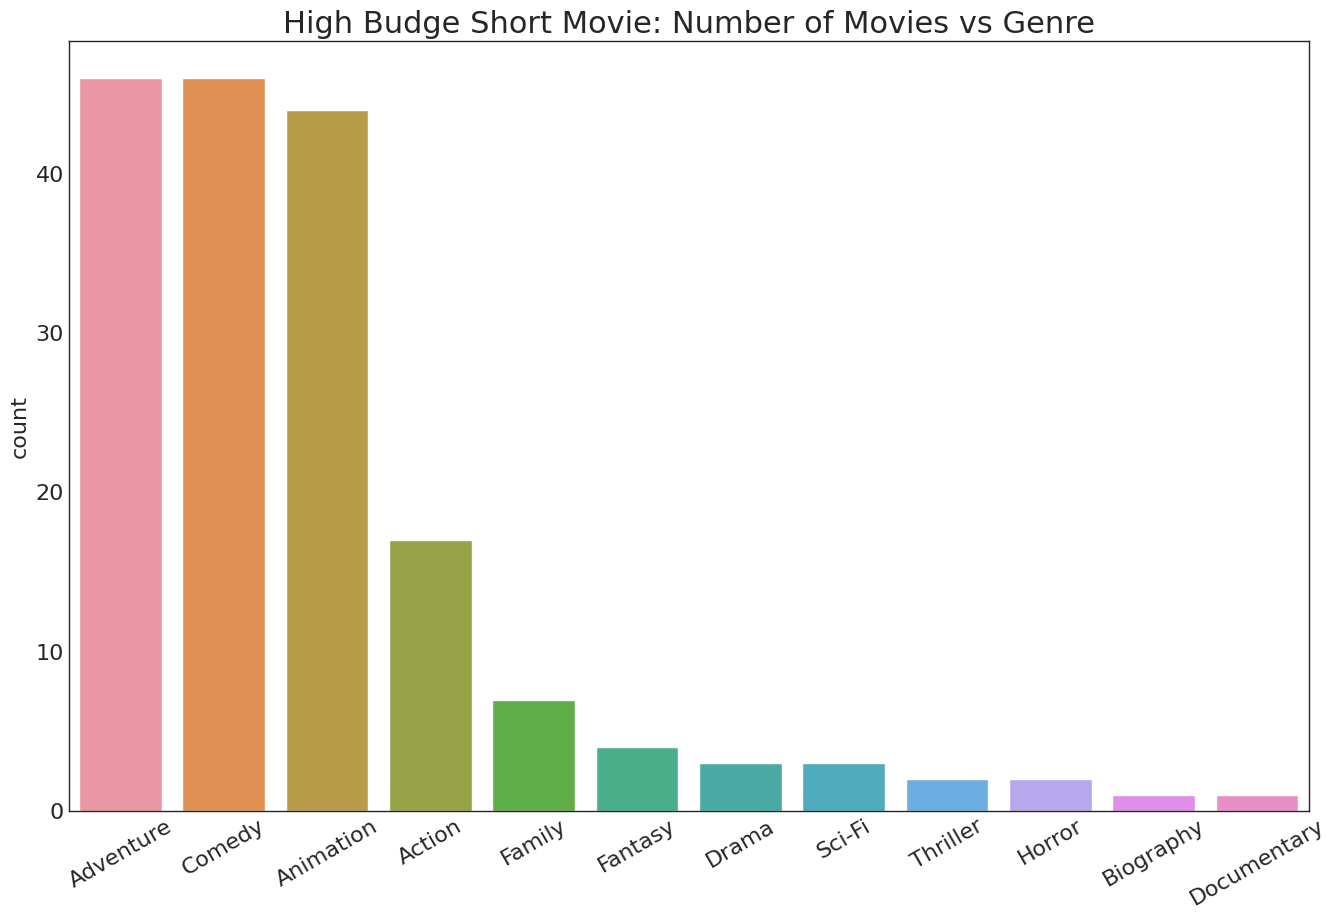

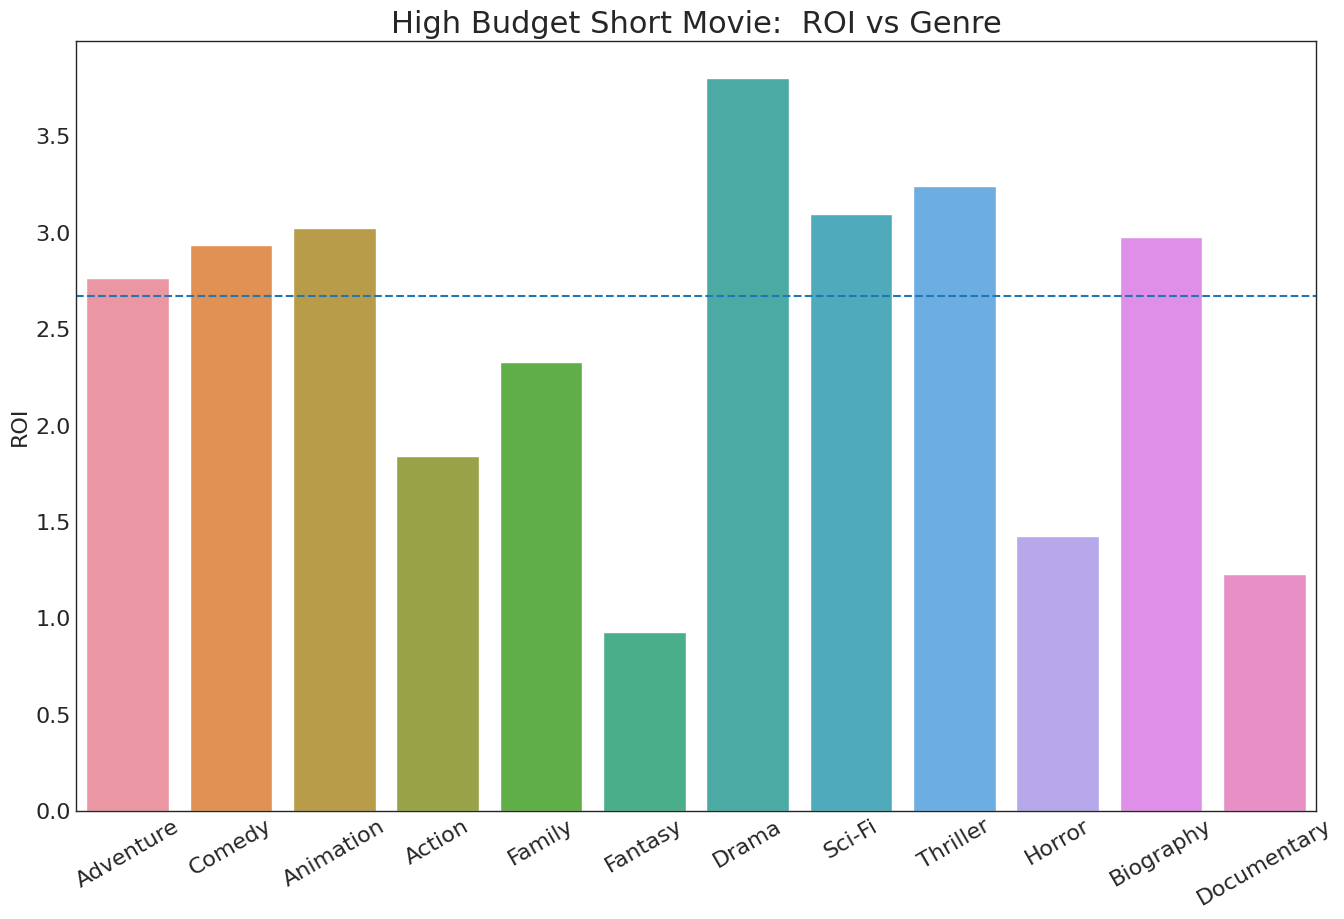

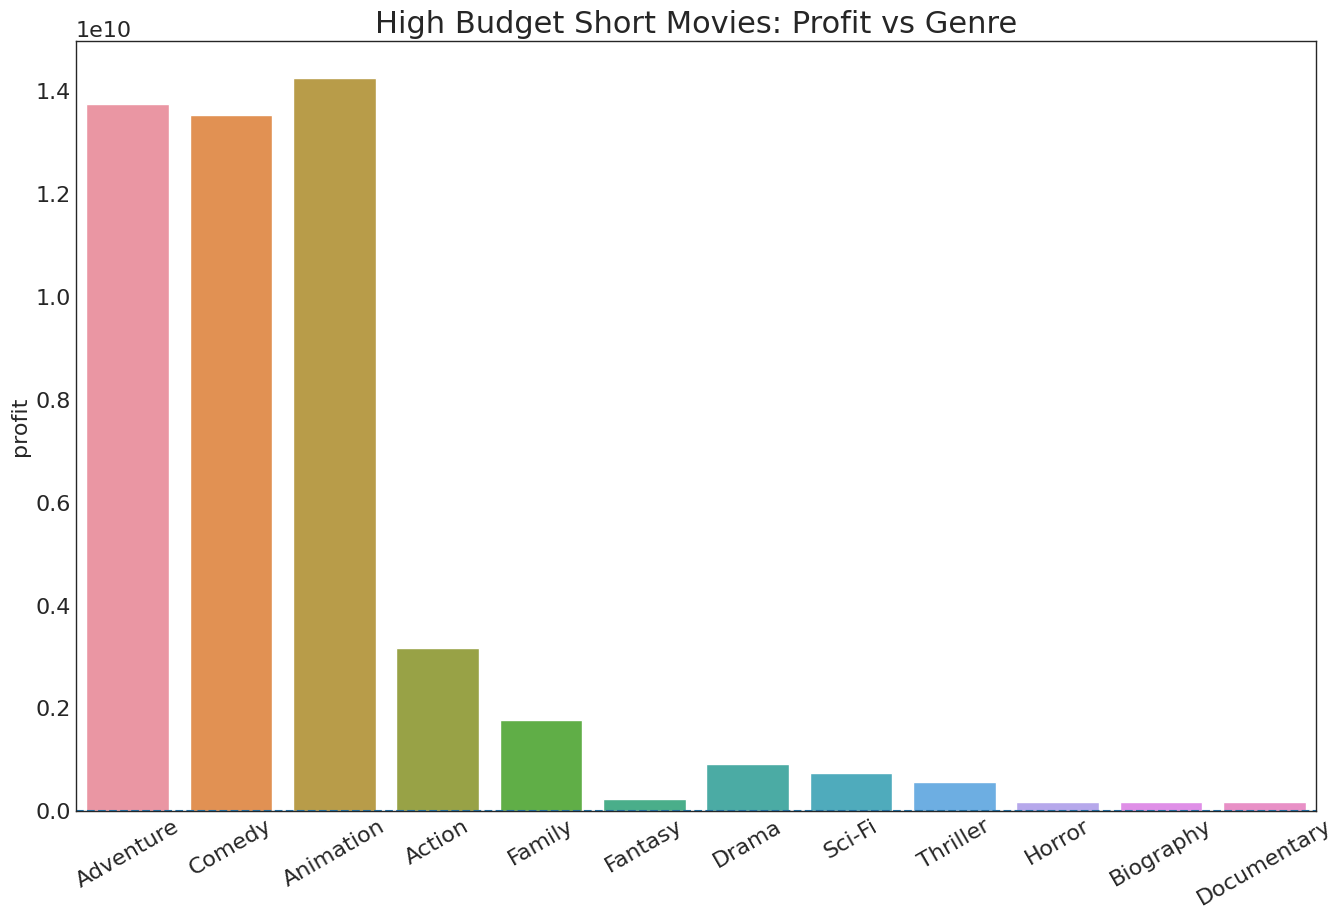

In [28]:
# For short_big_budget_movies, genre
count_ax, roi_ax, profit_ax, avg_roi, counts_and_roi_by_genre = viz.genre(hb_sm.copy())
count_ax.set_title("High Budge Short Movie: Number of Movies vs Genre")
roi_ax.set_title("High Budget Short Movie:  ROI vs Genre")
profit_ax.set_title("High Budget Short Movies: Profit vs Genre")
print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

Average ROI across all genres: 6.191056903225807


/workspaces/movies-dsc-project1/code/visualization.py:322: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_by_genre_unordered = sploded_data.groupby("genres").sum()["profit"]


,count,ROI,profit
Drama,10,6.191057,239903455
Romance,2,5.657013,48084610
Comedy,2,5.105710,45951387
Adventure,1,-0.253786,-888250
Action,1,1.237197,6433427
Crime,1,1.237197,6433427
Biography,1,3.749154,18745772
Sport,1,3.749154,18745772
Horror,1,0.046740,222016
Thriller,1,0.046740,222016


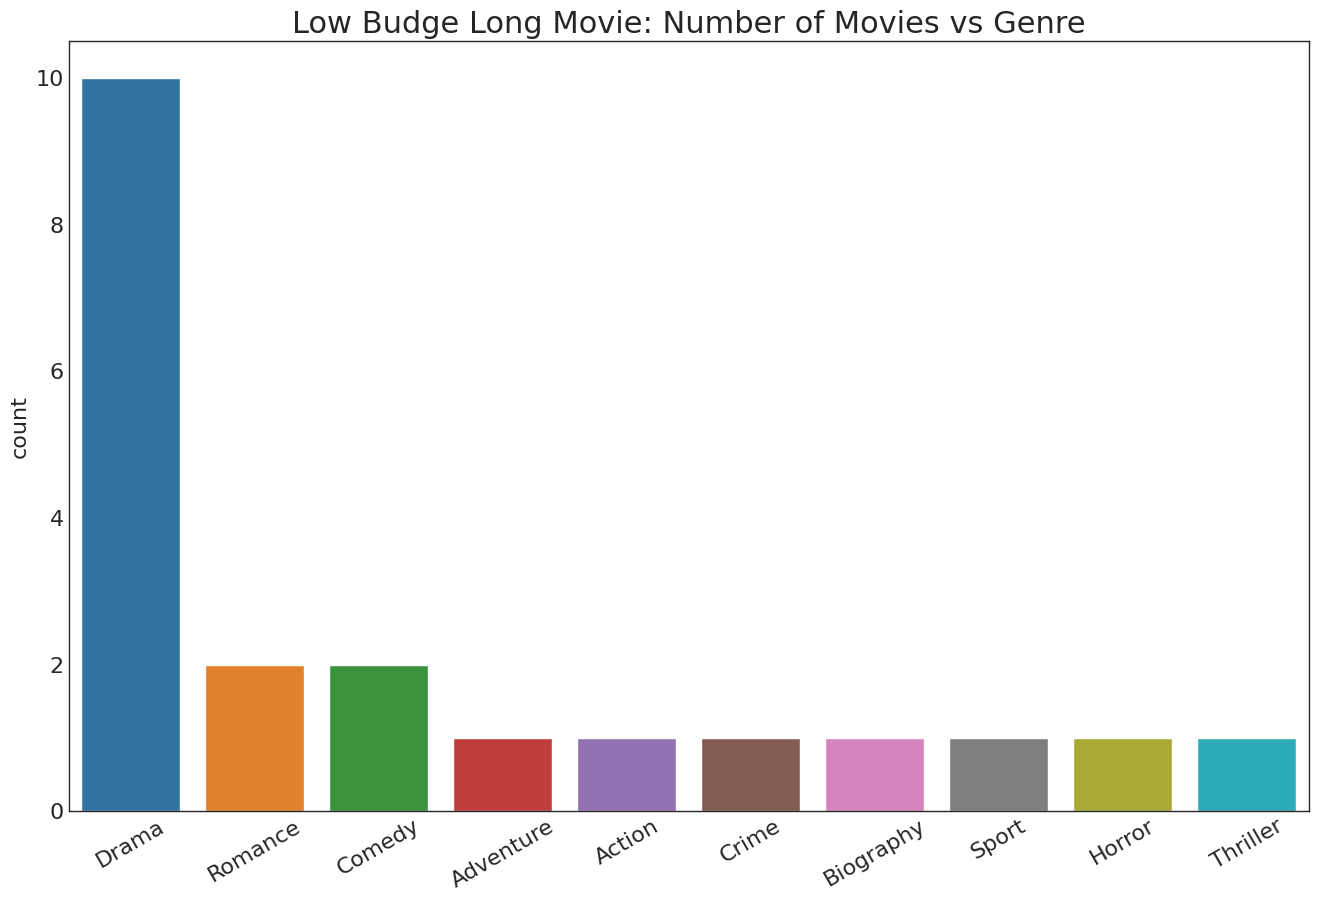

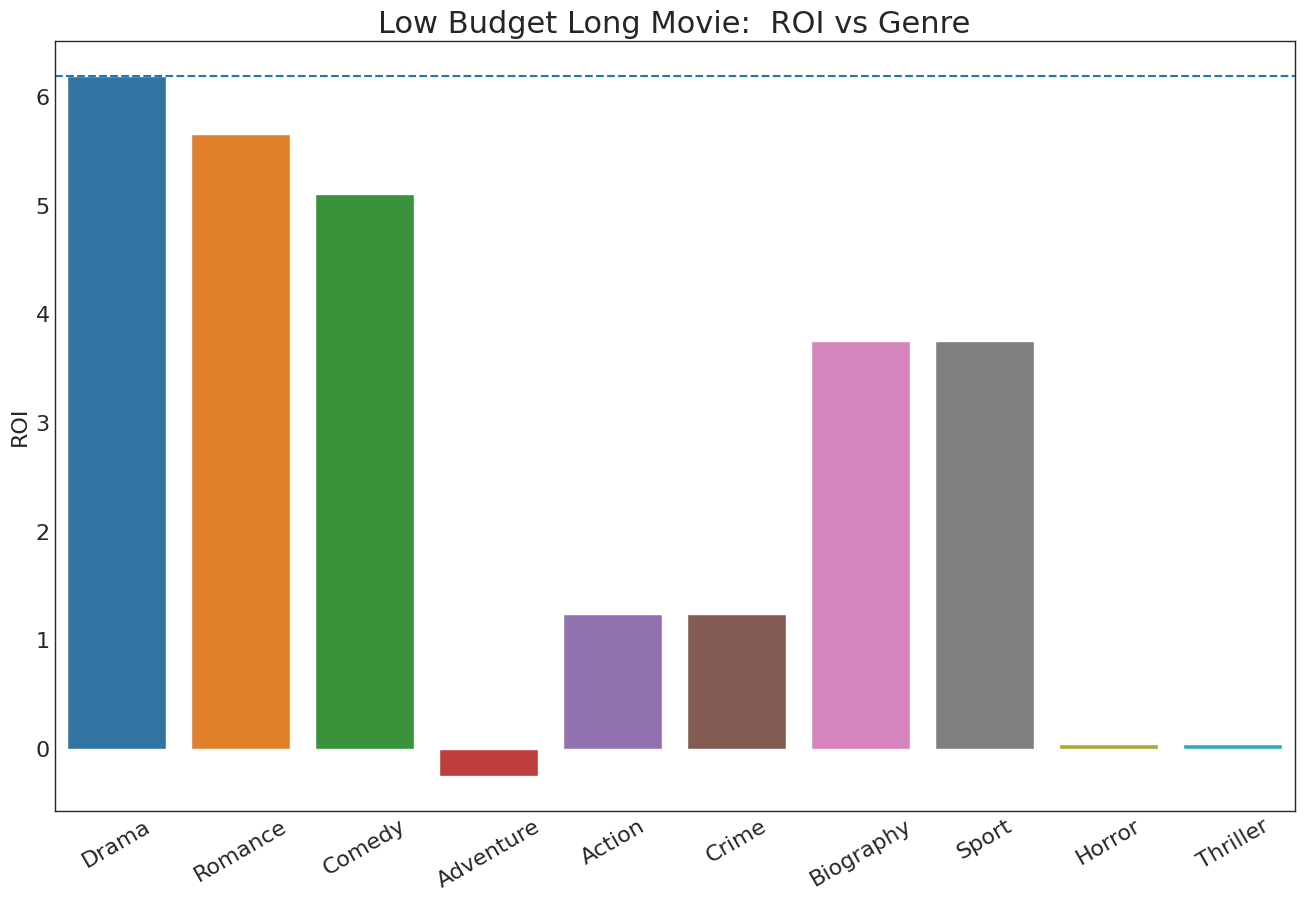

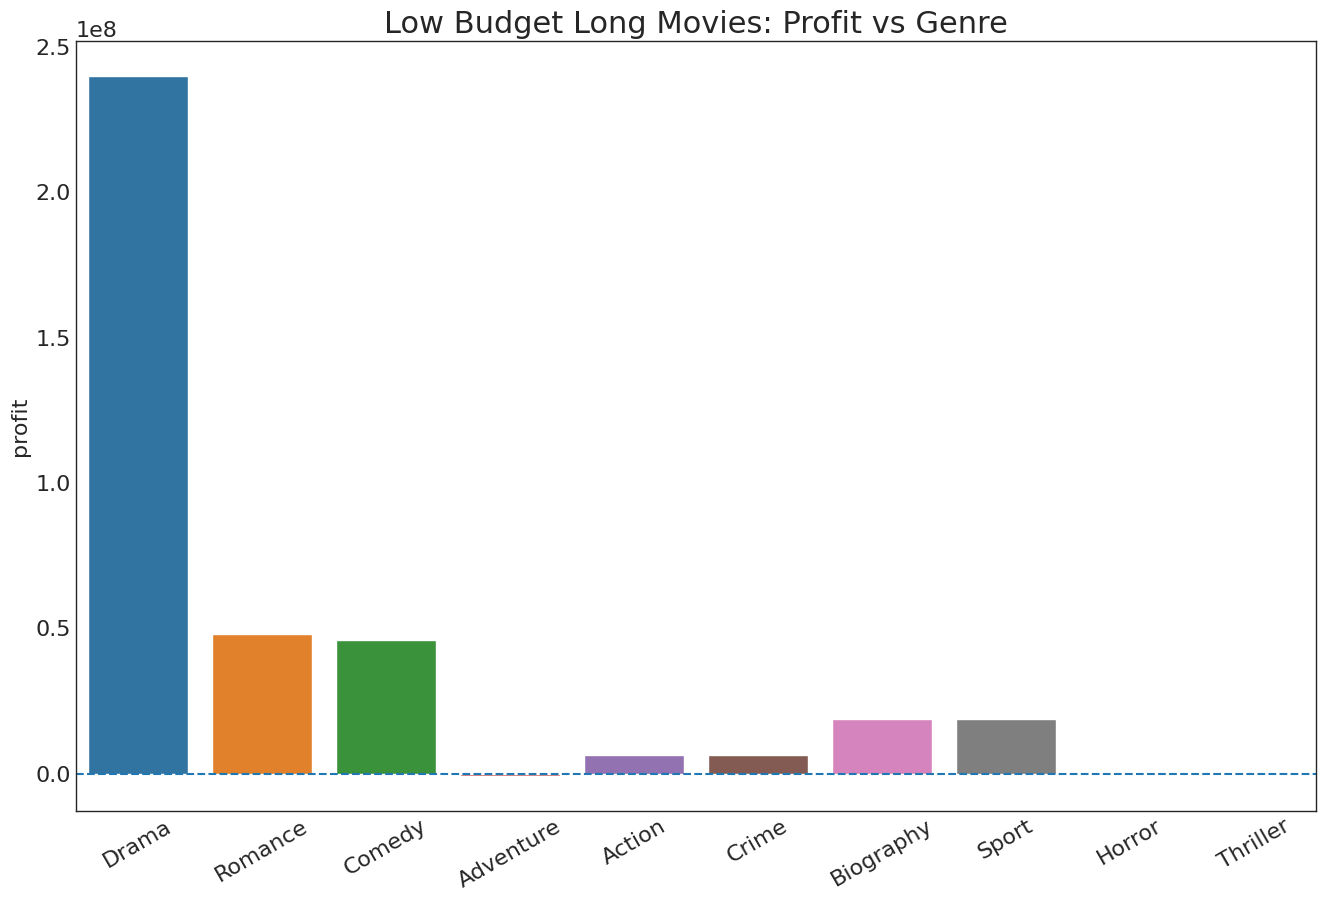

In [29]:
# For Long_low_budget_movies, genre
count_ax, roi_ax,profit_ax, avg_roi, counts_and_roi_by_genre = viz.genre(lb_lm.copy())
count_ax.set_title("Low Budge Long Movie: Number of Movies vs Genre")
roi_ax.set_title("Low Budget Long Movie:  ROI vs Genre")
profit_ax.set_title("Low Budget Long Movies: Profit vs Genre")
print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

/workspaces/movies-dsc-project1/code/visualization.py:322: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_by_genre_unordered = sploded_data.groupby("genres").sum()["profit"]


Average ROI across all genres: 11.625923545861298


,count,ROI,profit
Horror,12,17.100018,911430976
Comedy,8,4.851746,116927089
Drama,8,8.365030,236730347
Thriller,8,22.127037,703639772
Mystery,7,20.649913,722746961
Romance,4,0.474626,6454916
Fantasy,2,11.481449,74629419
Sci-Fi,2,5.487713,54877129
Documentary,2,5.512328,41342458
Action,2,-0.074449,-521142


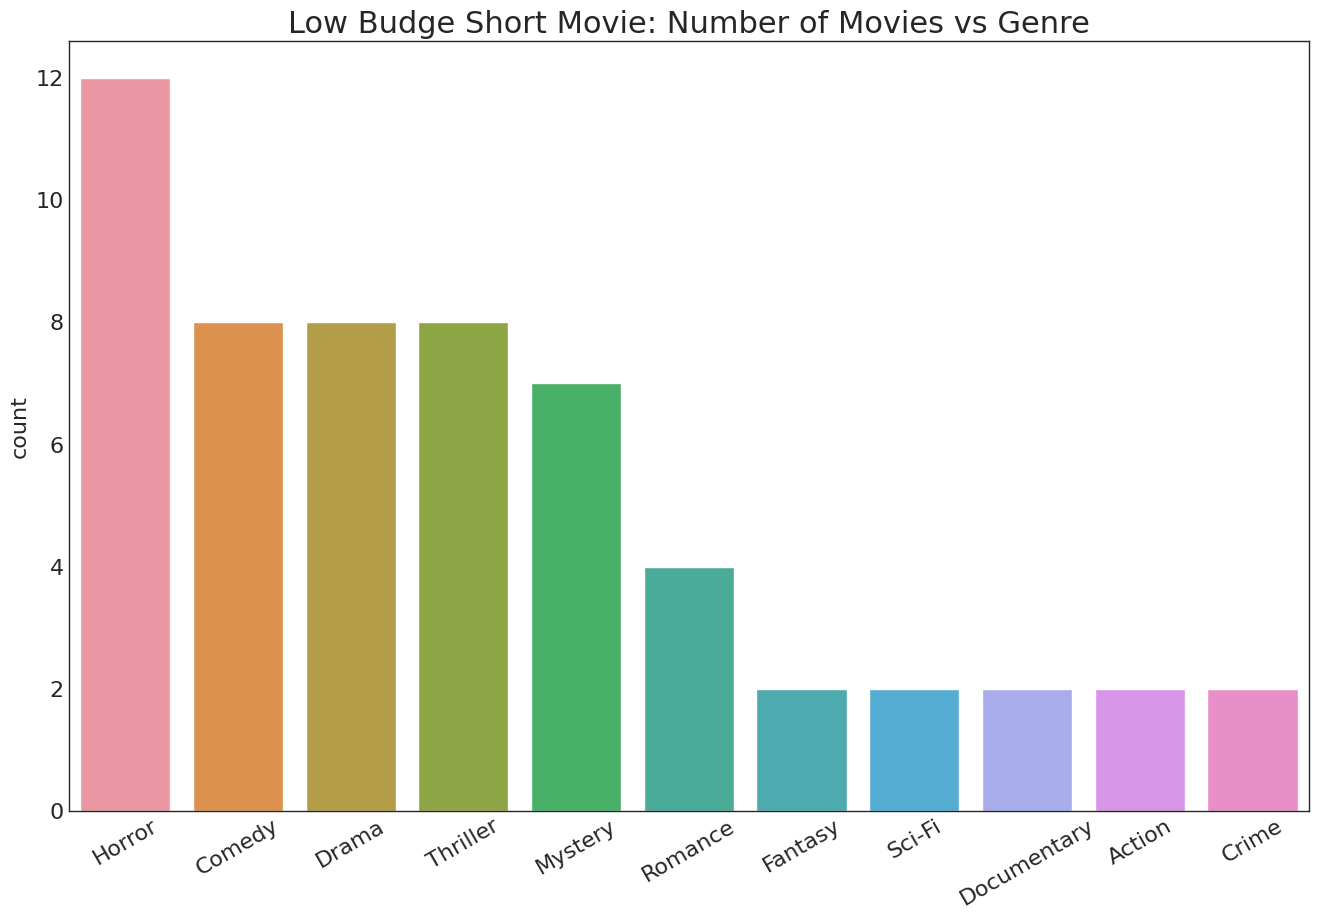

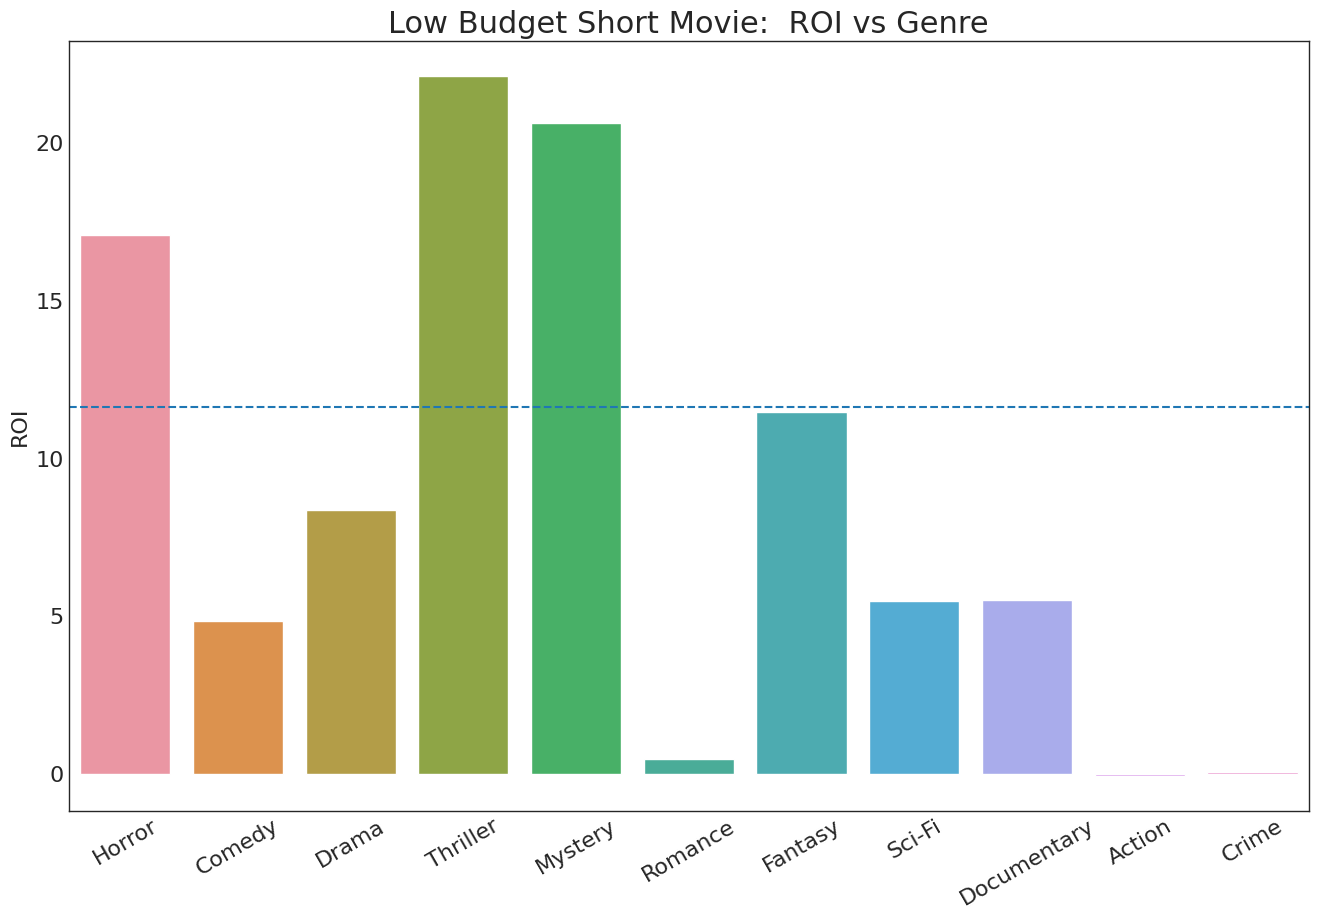

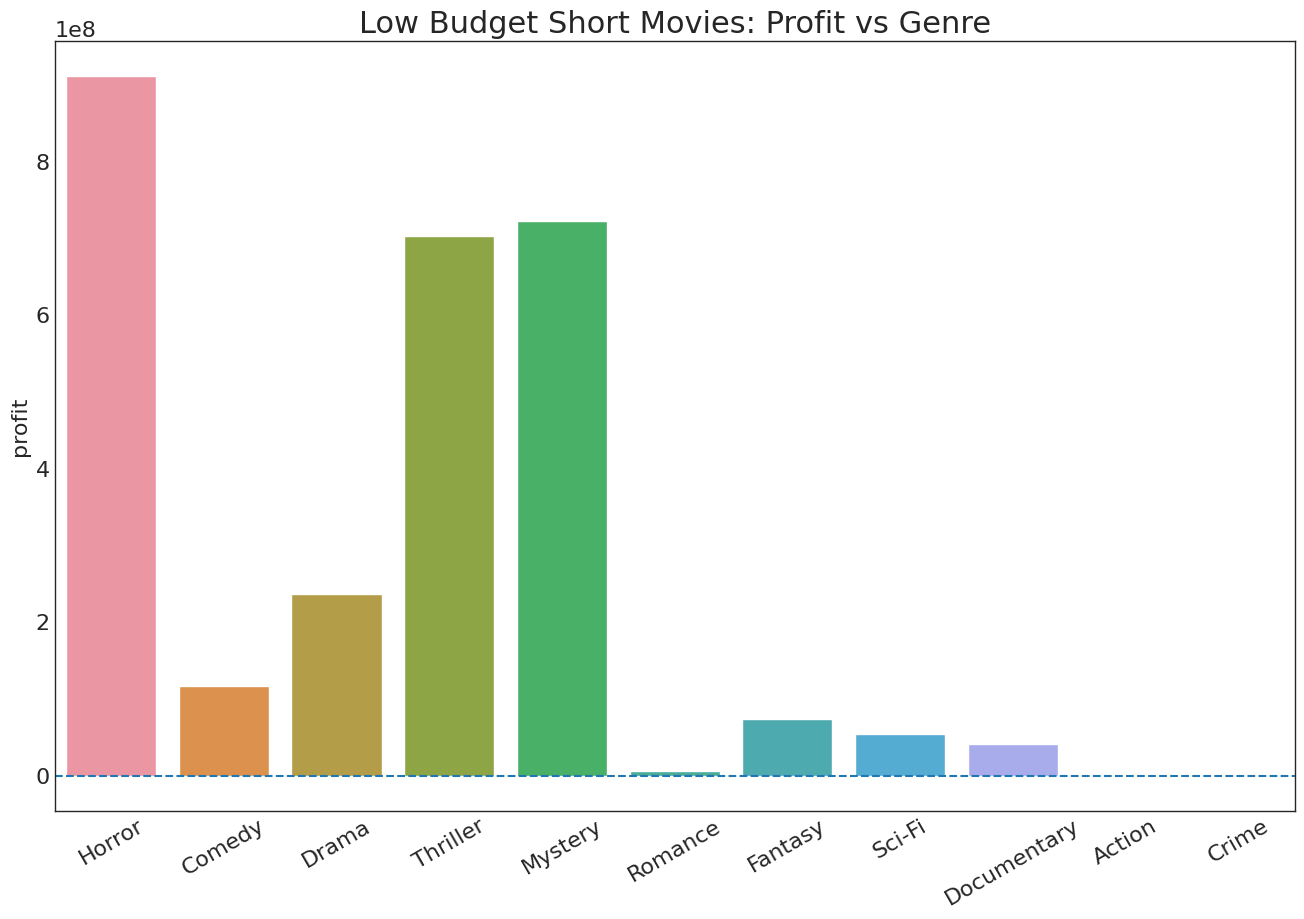

In [30]:
# For short_low_budget_movies, genre
count_ax, roi_ax, profit_ax, avg_roi, counts_and_roi_by_genre = viz.genre(lb_sm.copy())
count_ax.set_title("Low Budge Short Movie: Number of Movies vs Genre")
roi_ax.set_title("Low Budget Short Movie:  ROI vs Genre")
profit_ax.set_title("Low Budget Short Movies: Profit vs Genre")
print("Average ROI across all genres:", avg_roi)
counts_and_roi_by_genre

Text(0.5, 1.0, 'Overall: Studio')

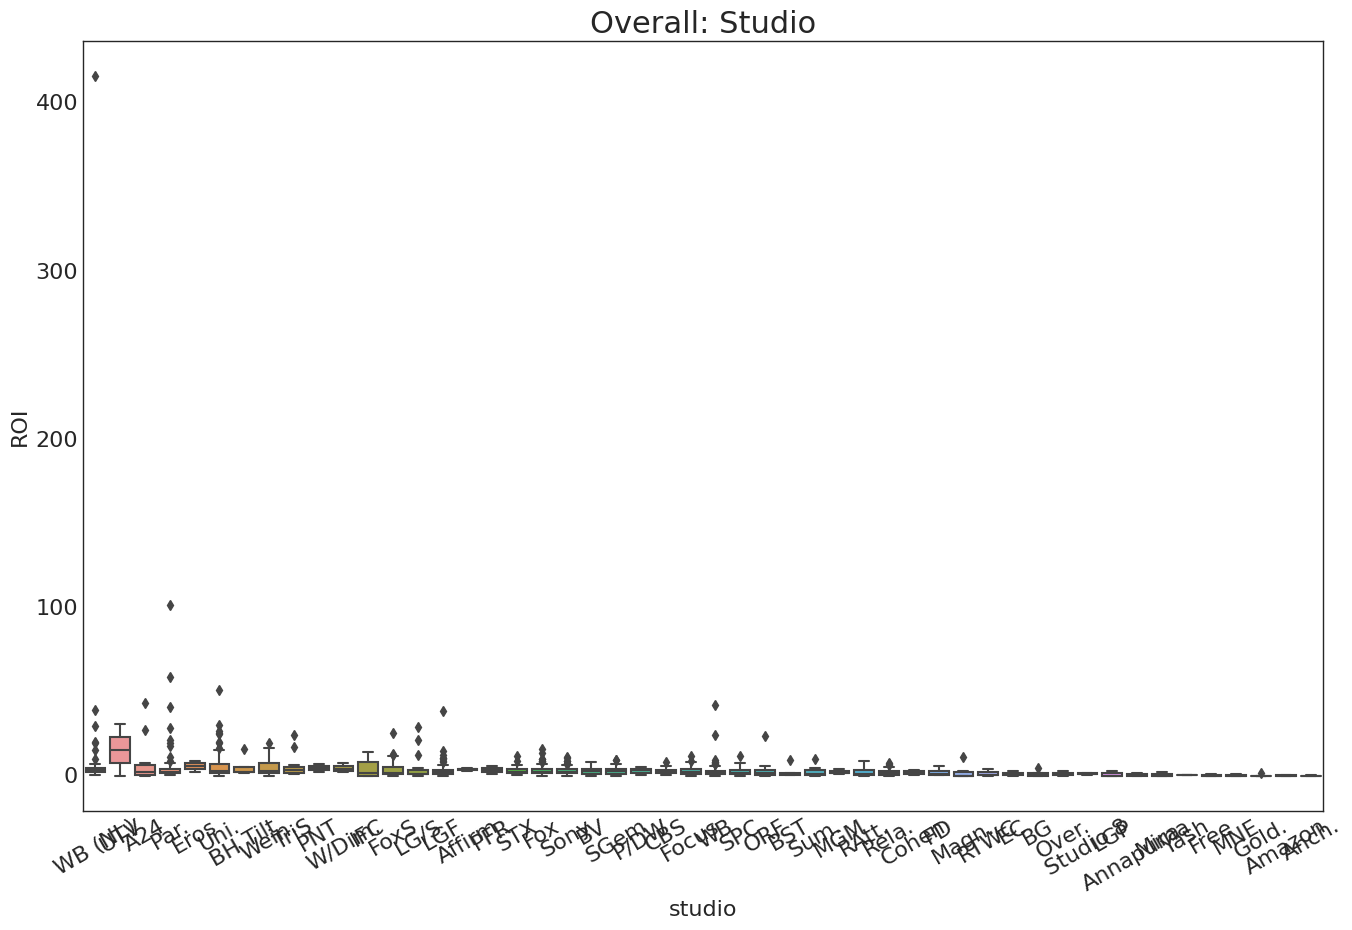

In [31]:
# Studio
boxplot = viz.data_to_plot(cleaned_data)
boxplot.set_title("Overall: Studio")

Text(0.5, 1.0, 'Long Movies: Studio')

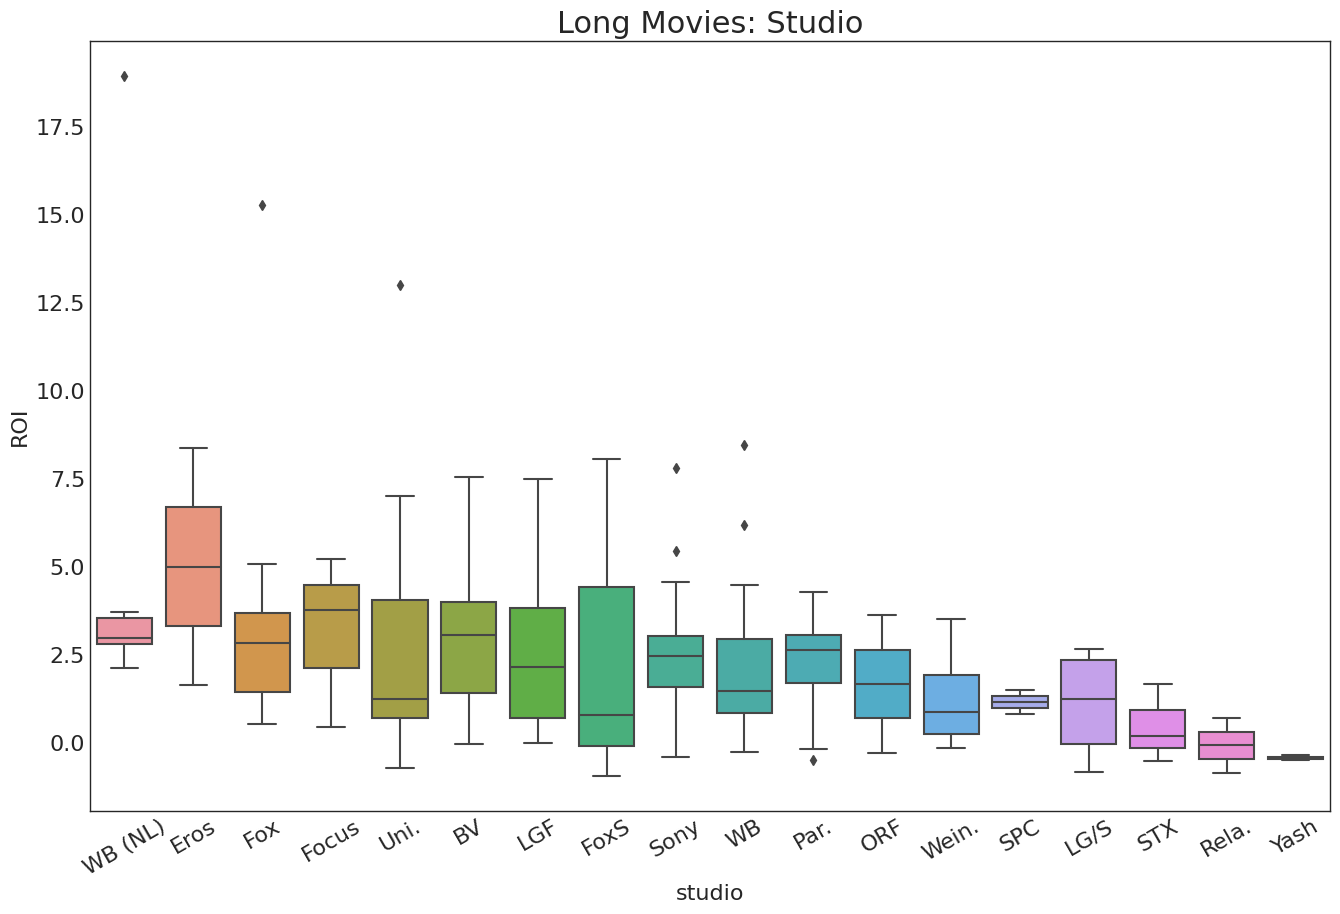

In [32]:
boxplot = viz.data_to_plot(lm)
boxplot.set_title("Long Movies: Studio")

Text(0.5, 1.0, 'Short Movies: Studio')

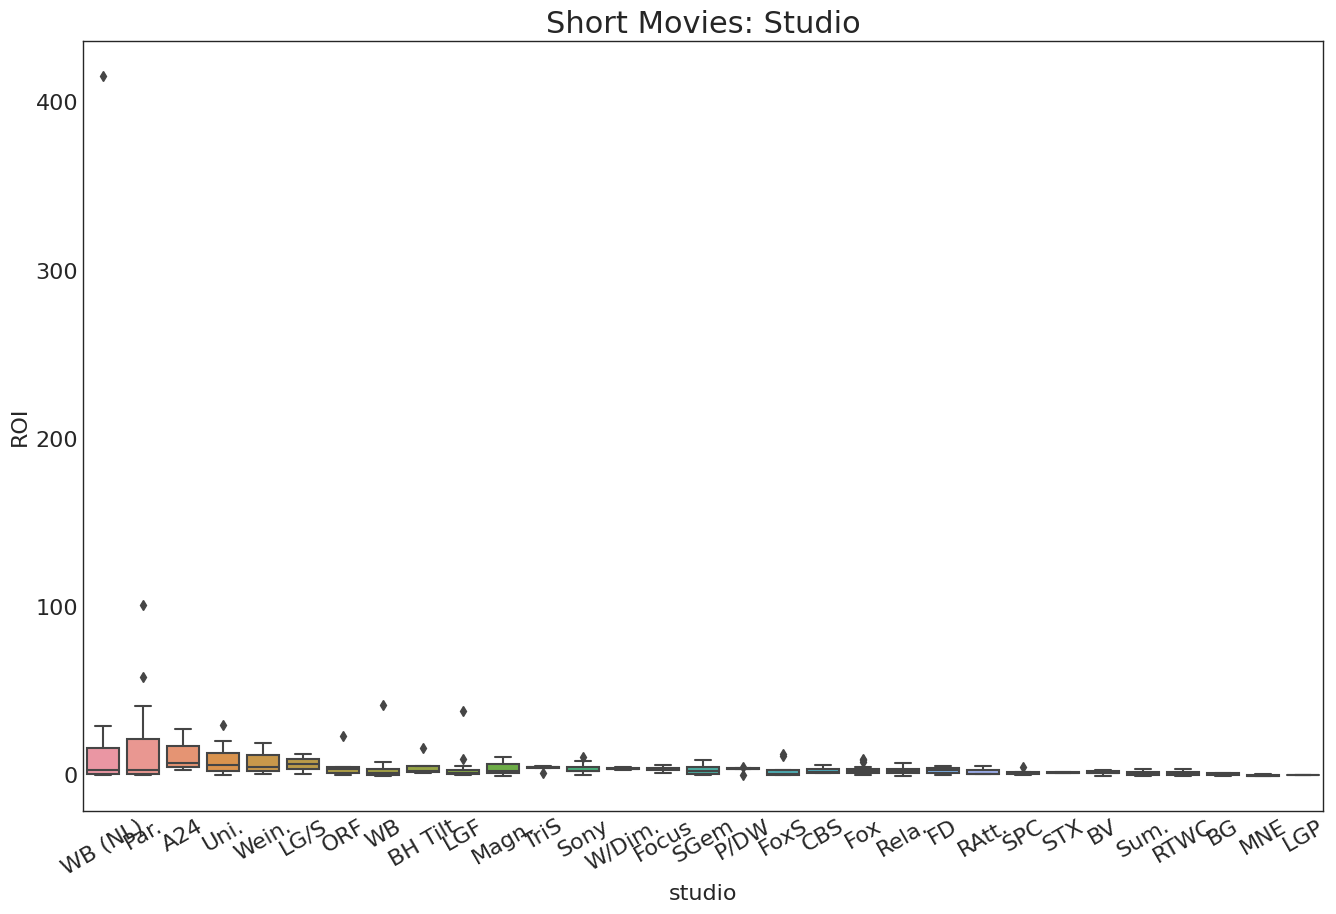

In [33]:
boxplot = viz.data_to_plot(sm)
boxplot.set_title("Short Movies: Studio")

Text(0.5, 1.0, 'High Budget Movies: Studio')

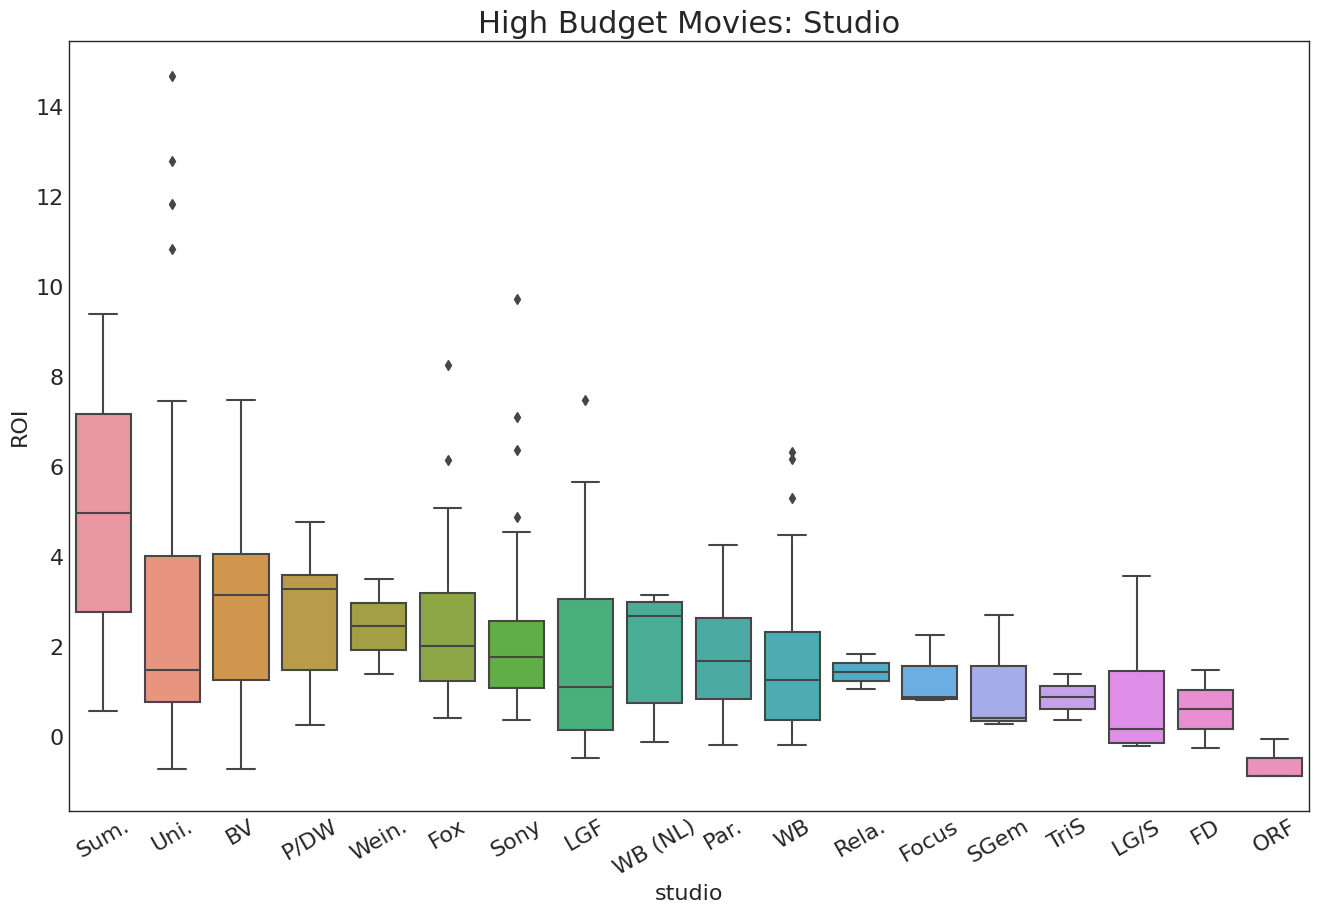

In [34]:
boxplot = viz.data_to_plot(hb)
boxplot.set_title("High Budget Movies: Studio")

Text(0.5, 1.0, 'Low Budget Movies: Studio')

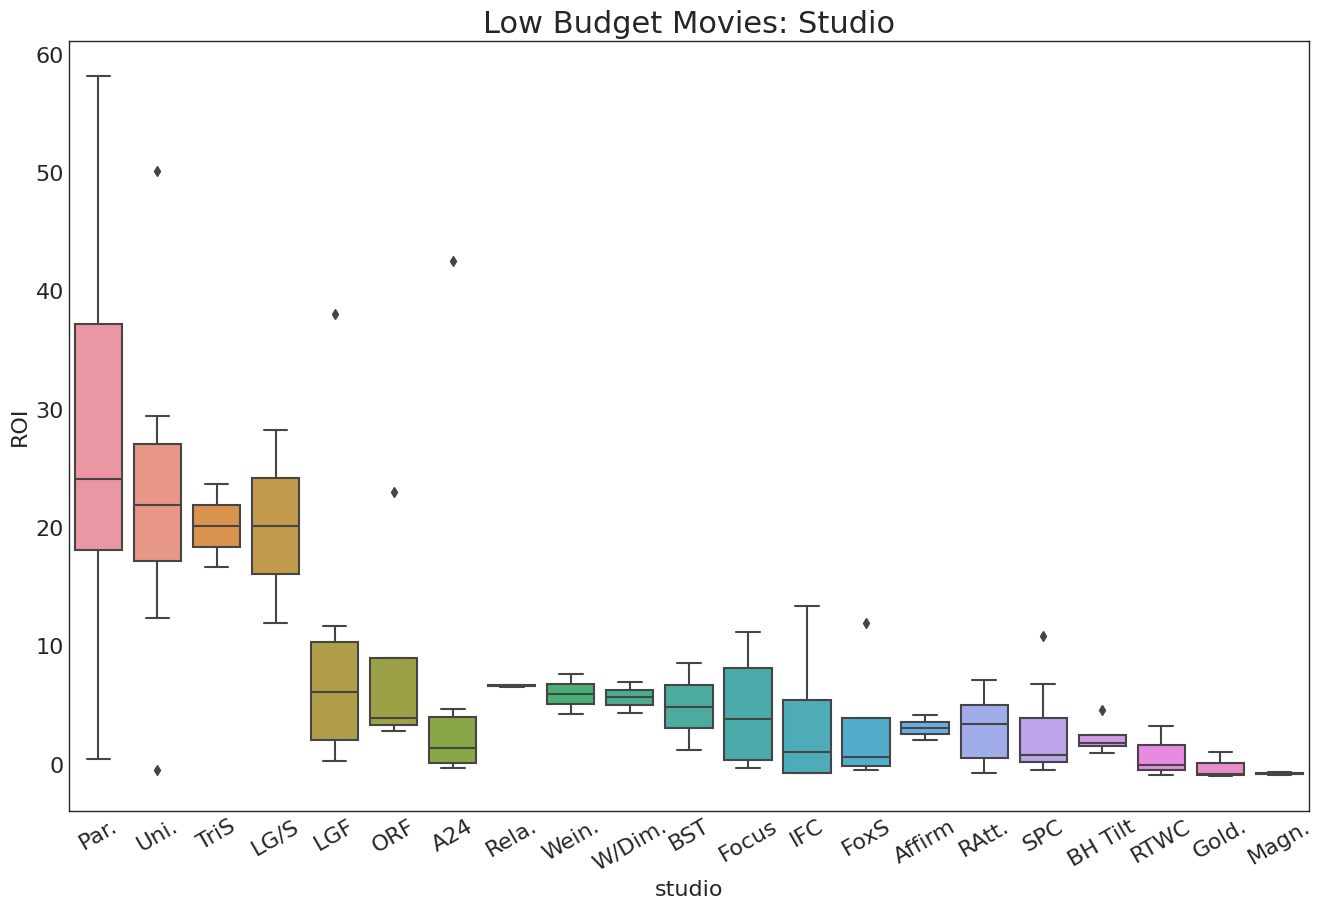

In [35]:
boxplot = viz.data_to_plot(lb)
boxplot.set_title("Low Budget Movies: Studio")

Text(0.5, 1.0, 'High Budget Long Movies: Studio')

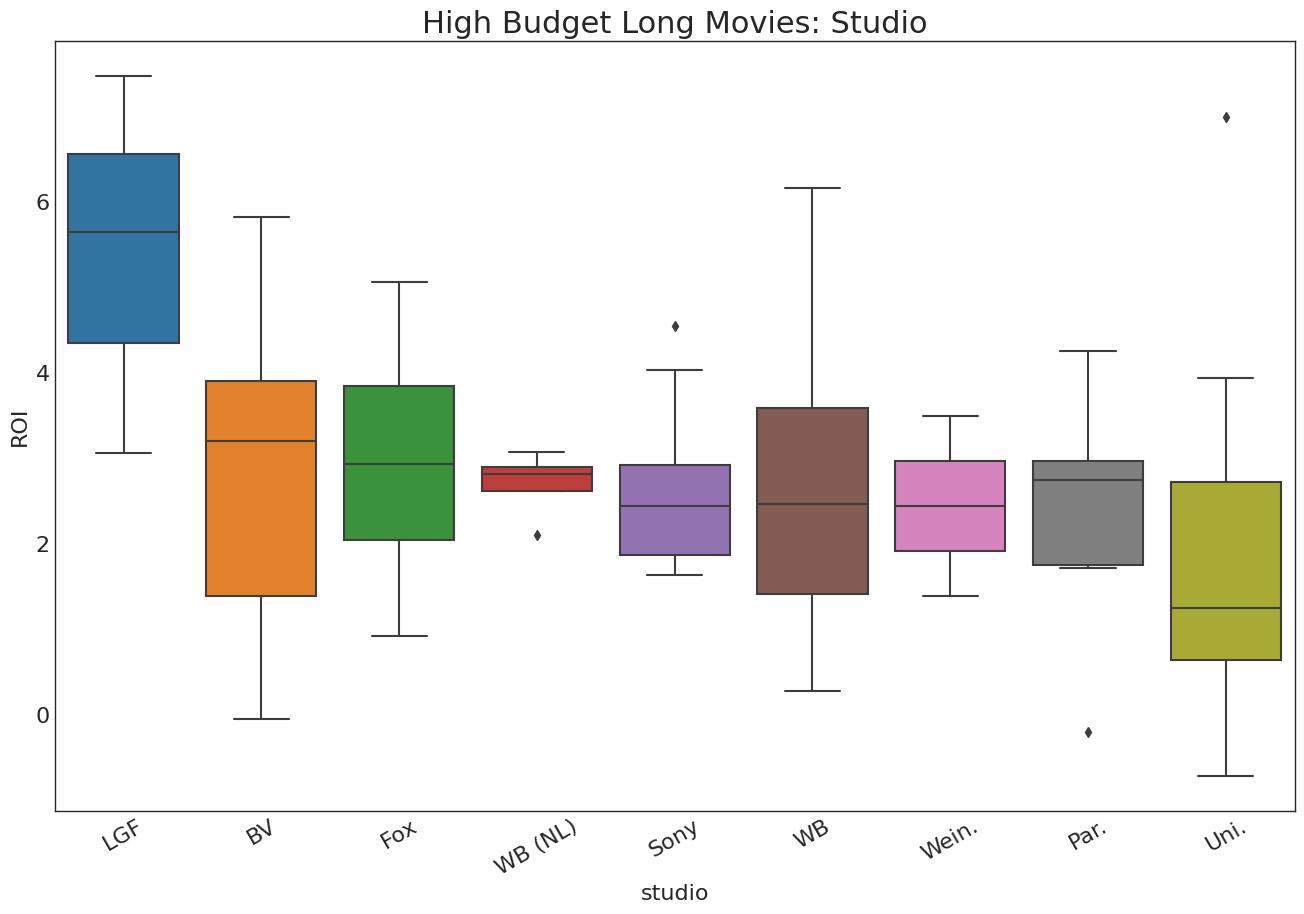

In [36]:
boxplot = viz.data_to_plot(hb_lm)
boxplot.set_title("High Budget Long Movies: Studio")

Text(0.5, 1.0, 'Low Budget Short Movies: Studio')

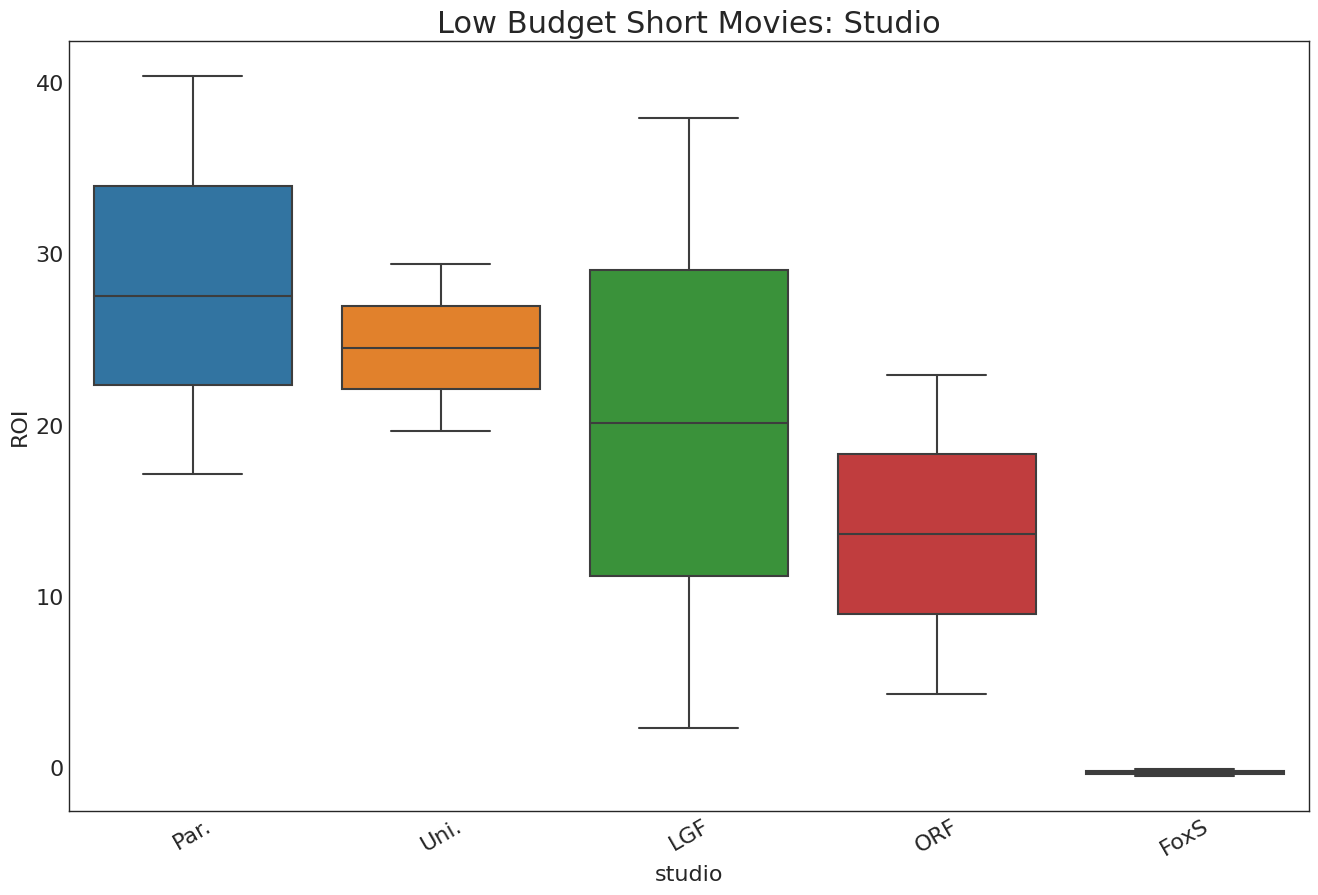

In [37]:
boxplot = viz.data_to_plot(lb_sm)
boxplot.set_title("Low Budget Short Movies: Studio")

In [38]:
hb_lm[["original_title",'studio','runtime_minutes','ROI','profit','averagerating','genres']].sort_values(by=['ROI'],ascending= False).head(10)

,original_title,studio,runtime_minutes,ROI,profit,averagerating,genres
909,The Hunger Games,LGF,142.0,7.474042,597923379,7.2,"Action,Adventure,Sci-Fi"
308,Furious Seven,Uni.,137.0,6.993278,1328722794,7.2,"Action,Crime,Thriller"
81,Aquaman,WB,143.0,6.168092,986894640,7.1,"Action,Adventure,Fantasy"
91,Avengers: Infinity War,BV,149.0,5.827114,1748134200,8.5,"Action,Adventure,Sci-Fi"
121,Black Panther,BV,134.0,5.741291,1148258224,7.3,"Action,Adventure,Sci-Fi"
910,The Hunger Games: Catching Fire,LGF,146.0,5.652831,734868047,7.5,"Action,Adventure,Sci-Fi"
944,The Martian,Fox,144.0,5.067328,547271443,8.0,"Adventure,Drama,Sci-Fi"
327,Gone Girl,Fox,149.0,5.042085,307567189,8.1,"Drama,Mystery,Thriller"
1058,Transformers: Dark of the Moon,P/DW,154.0,4.763028,928790543,6.2,"Action,Adventure,Sci-Fi"
727,Skyfall,Sony,143.0,4.552635,910526981,7.8,"Action,Adventure,Thriller"


In [39]:
lb_sm[["original_title",'studio','runtime_minutes','ROI','profit','averagerating','genres']].sort_values(by=['ROI'],ascending= False).head(10)

,original_title,studio,runtime_minutes,ROI,profit,averagerating,genres
599,Paranormal Activity 3,Par.,83.0,40.407969,202039844,5.8,"Horror,Mystery,Thriller"
928,The Last Exorcism,LGF,87.0,37.981056,68365900,5.6,"Drama,Horror,Thriller"
978,The Purge,Uni.,85.0,29.422194,88266581,5.7,"Horror,Thriller"
481,Lights Out,WB (NL),81.0,28.761302,143806510,6.3,"Drama,Horror,Mystery"
600,Paranormal Activity 4,Par.,88.0,27.563598,137817992,4.6,"Horror,Mystery,Thriller"
19,A Haunted House,ORF,86.0,22.969023,57422558,5.1,"Comedy,Fantasy"
587,Ouija,Uni.,89.0,19.660126,98300632,4.5,"Horror,Mystery,Thriller"
602,Paranormal Activity: The Marked Ones,Par.,84.0,17.180971,85904854,5.0,"Horror,Mystery,Thriller"
443,Kevin Hart: Let Me Explain,LG/S,75.0,11.930902,29827255,6.8,"Comedy,Documentary"
933,The Lazarus Effect,Rela.,83.0,6.671862,33359310,5.2,"Horror,Mystery,Sci-Fi"


## Conclusion
